Projet machine learning (30/01/2024)

# Membres du groupe

- CHEN Yiqing
- YE Ningxin
- ZHAO Julien

# 1. Compréhension du problème

## Description du Problème et Objectifs de la Solution

Le problème à résoudre concerne la prédiction du succès des campagnes de marketing direct d'une institution bancaire portugaise. Les campagnes étaient basées sur des appels téléphoniques, et plusieurs contacts avec le même client étaient parfois nécessaires pour déterminer s'il souscrirait ou non à un dépôt à terme de la banque.

## Objectif de la Solution

Prédire si un client souscrira ou non à un dépôt à terme (variable cible : 'yes' ou 'no').

## Description des Données

### Features (Input)

1.  age (numeric)
2.  job : type d'emploi (catégorique: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services")
3.  marital : statut matrimonial (catégorique: "married","divorced","single"; note: "divorced" means divorced or widowed)
4.  education (catégorique: "unknown","secondary","primary","tertiary")
5.  default: a un crédit en défaut? (binaire: "yes","no")
6.  balance: solde moyen annuel, en euros (numérique)
7.  housing: a un prêt immobilier? (binaire: "yes","no")
8.  loan: a un prêt personnel? (binaire: "yes","no")
9.  contact: type de communication de contact (catégorique: "unknown","telephone","cellular")
10.  day: dernier jour de contact du mois (numérique)
11.  month: dernier mois de contact de l'année (catégorique: "jan", "feb", "mar", ..., "nov", "dec")
12.  duration: durée du dernier contact, en secondes (numérique)
13.  campaign: nombre de contacts effectués pendant cette campagne et pour ce client (numérique, inclut le dernier contact)
14.  pdays: nombre de jours écoulés depuis le dernier contact avec le client lors d'une campagne précédente (numérique, -1 signifie que le client n'a pas été contacté précédemment)
15.  previous: nombre de contacts effectués avant cette campagne et pour ce client (numérique)
16.  poutcome: résultat de la campagne marketing précédente (catégorique: "unknown","other","failure","success")

#### Variable Cible (Output)

17.  y: le client a-t-il souscrit à un dépôt à terme? (binaire)

## Algorithmes à Utiliser

Étant donné que la variable cible ("y") est binaire, avec les valeurs "yes" ou "no", la tâche consiste en une classification binaire. Pour ce type de problème, il est possible de recourir à des algorithmes de classification que nous avons étudiés en cours de Machine Learning, tels que le k-NN, les arbres de décision, etc. Cependant, nous souhaitons également explorer l'utilisation d'autres algorithmes que nous n'avons pas encore abordés en cours, comme la régression logistique et les machines à vecteurs de support. Il peut également être pertinent d'investiguer l'utilisation d'algorithmes de régression pour prédire d'autres attributs, dans l'espoir d'améliorer la précision de la prédiction de la variable cible.

- Classification
1. k plus proches voisins (KNeighbors)
2. Arbre de décision (Decision Tree)
3. Forêt aléatoire (Random Forest)
4. Naïve bayésienne (Naive Bayes)
5. Réseau de neurones (Neural Network)
6. Régression logique (Logistic Regression)
7. Machine à vecteurs de support (SVM)

- Régression
1. Régression linéaire (Linear Regression)

En considérant la nature binaire de la variable cible, privilégier les algorithmes de classification est approprié. Cependant, l'exploration des algorithmes de régression peut apporter des informations supplémentaires sur la relation entre les caractéristiques et d'autres attributs, ce qui pourrait potentiellement améliorer la qualité de la prédiction pour la variable cible.


## Métriques d'Évaluation

Nous évaluerons l'efficacité des algorithmes en utilisant des métriques telles que la précision, le rappel, le F1-score, et la courbe ROC-AUC. Il est essentiel de ne pas seulement prédire le succès, mais aussi de minimiser les faux positifs et les faux négatifs. Étant donné que les classes sont déséquilibrées, nous accorderons une attention particulière aux performances du score F1 et de l'AUC, et une moindre attention à l'accuracy qui peut être trompeuse en raison de ce déséquilibre.

1.   Accuracy
2.   Précision
3.   Rappel (Recall)
4.   F1-score
5.   Courbe ROC-AUC

Pour chaque algorithme que nous allons utiliser, nous en testerons plusieurs afin de choisir ceux qui présentent les meilleures performances. Nous ajusterons les paramètres tout en prenant également en considération leur robustesse, précision par le taux d'erreur, concision et complexité algorithmique.

En implémentant ces étapes, nous pourrons développer, évaluer et comparer différentes approches pour résoudre le problème de prédiction du succès des campagnes de marketing bancaire.


# 2. Chargement des données

In [ ]:
from datetime import datetime
from pathlib import Path
from sklearn.model_selection import train_test_split
import imblearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import (
    decomposition,
    discriminant_analysis,
    ensemble,
    linear_model,
    metrics,
    model_selection,
    naive_bayes,
    pipeline,
    preprocessing,
    svm,
    preprocessing,
    naive_bayes,
)

In [ ]:
data = "/content/bank-full.csv"
df = pd.read_csv(data, delimiter=";")

# Séparation des caractéristiques (X) et de la variable cible (y)
X = df.drop('y', axis=1) # X contient toutes les colonnes sauf 'y'
y = df['y'] # y contient la colonne 'y', la variable cible à prédire

In [ ]:
X.head(3) # À travers ces trois premières lignes, nous allons rencontrer des valeurs négatives, tout comme dans la colonne "pdays

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown


In [ ]:
y.head(3)

0    no
1    no
2    no
Name: y, dtype: object

# 3. Analyse exploratoire

## Types des variables

In [ ]:
types = X.dtypes
type_counts = types.value_counts()
print(type_counts)

object    9
int64     7
dtype: int64


In [ ]:
X.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## Distribution de la variable cible

In [ ]:
y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [ ]:
y.describe()

count     45211
unique        2
top          no
freq      39922
Name: y, dtype: object

## Graphiques

In [ ]:
ys = y.copy()
ys = ys.map({'yes': 1, 'no': 0})
print(type(ys))
print(ys.describe())

<class 'pandas.core.series.Series'>
count    45211.000000
mean         0.116985
std          0.321406
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: y, dtype: float64


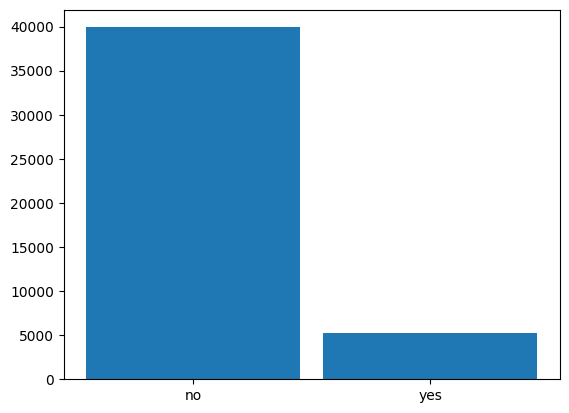

In [ ]:
ys.hist(bins=2, grid=False, align="left", rwidth=0.9)
plt.xticks([0, 0.5], ["no", "yes"])
plt.show() # On observe que les deux classes sont déséquilibrées

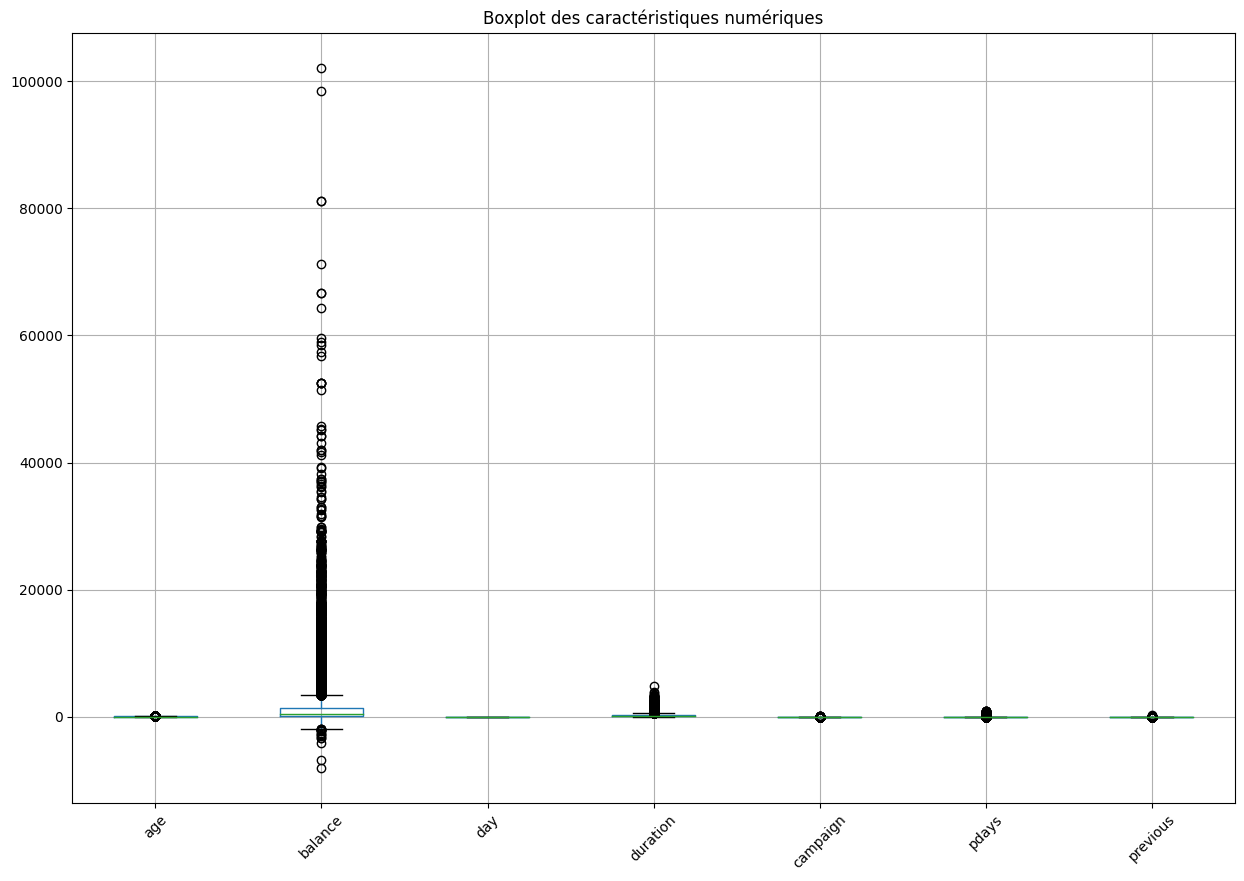

In [ ]:
# Sélectionner les variables numériques
numerical_features = X.select_dtypes(include=['int64'])

plt.figure(figsize=(15, 10))
numerical_features.boxplot()
plt.xticks(rotation=45)
plt.title('Boxplot des caractéristiques numériques')
plt.show()

## Corrélations

<Axes: >

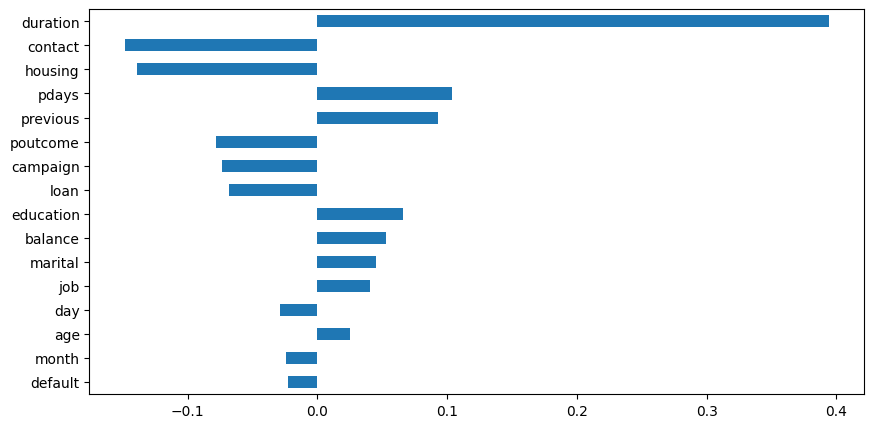

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

x_df = X.copy()

for i in x_df:
  if x_df[i].dtype == 'object':
    x_df[i] = label_encoder.fit_transform(x_df[i])

corr = x_df.corrwith(ys).sort_values(key=abs)

corr.plot.barh(figsize=(10,5))

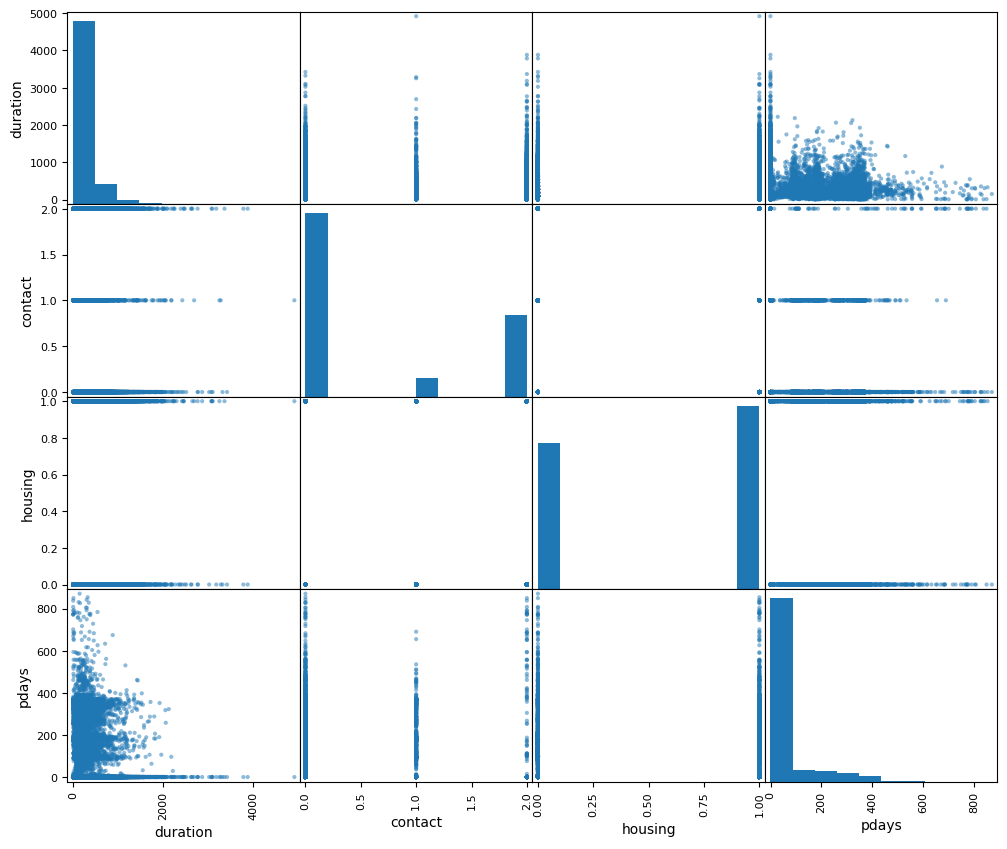

In [ ]:
# Les quatres descripteur les plus corrélées à ys sont "duration", "contact", "housing", "pdays"
FTS = ["duration", "contact", "housing", "pdays"]
pd.plotting.scatter_matrix(x_df[FTS], figsize=(12, 10))
plt.show()

In [ ]:
x1h_df = X.copy()

categorical_cols = x1h_df.select_dtypes(include=['object']).columns

features_encoded = pd.get_dummies(x1h_df, columns=categorical_cols)

corr_with_y = features_encoded.corrwith(ys).sort_values(ascending=False)

corr_with_y.head()

duration            0.394521
poutcome_success    0.306788
housing_no          0.139173
contact_cellular    0.135873
month_mar           0.129456
dtype: float64

In [ ]:
x1h_df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown


<Axes: >

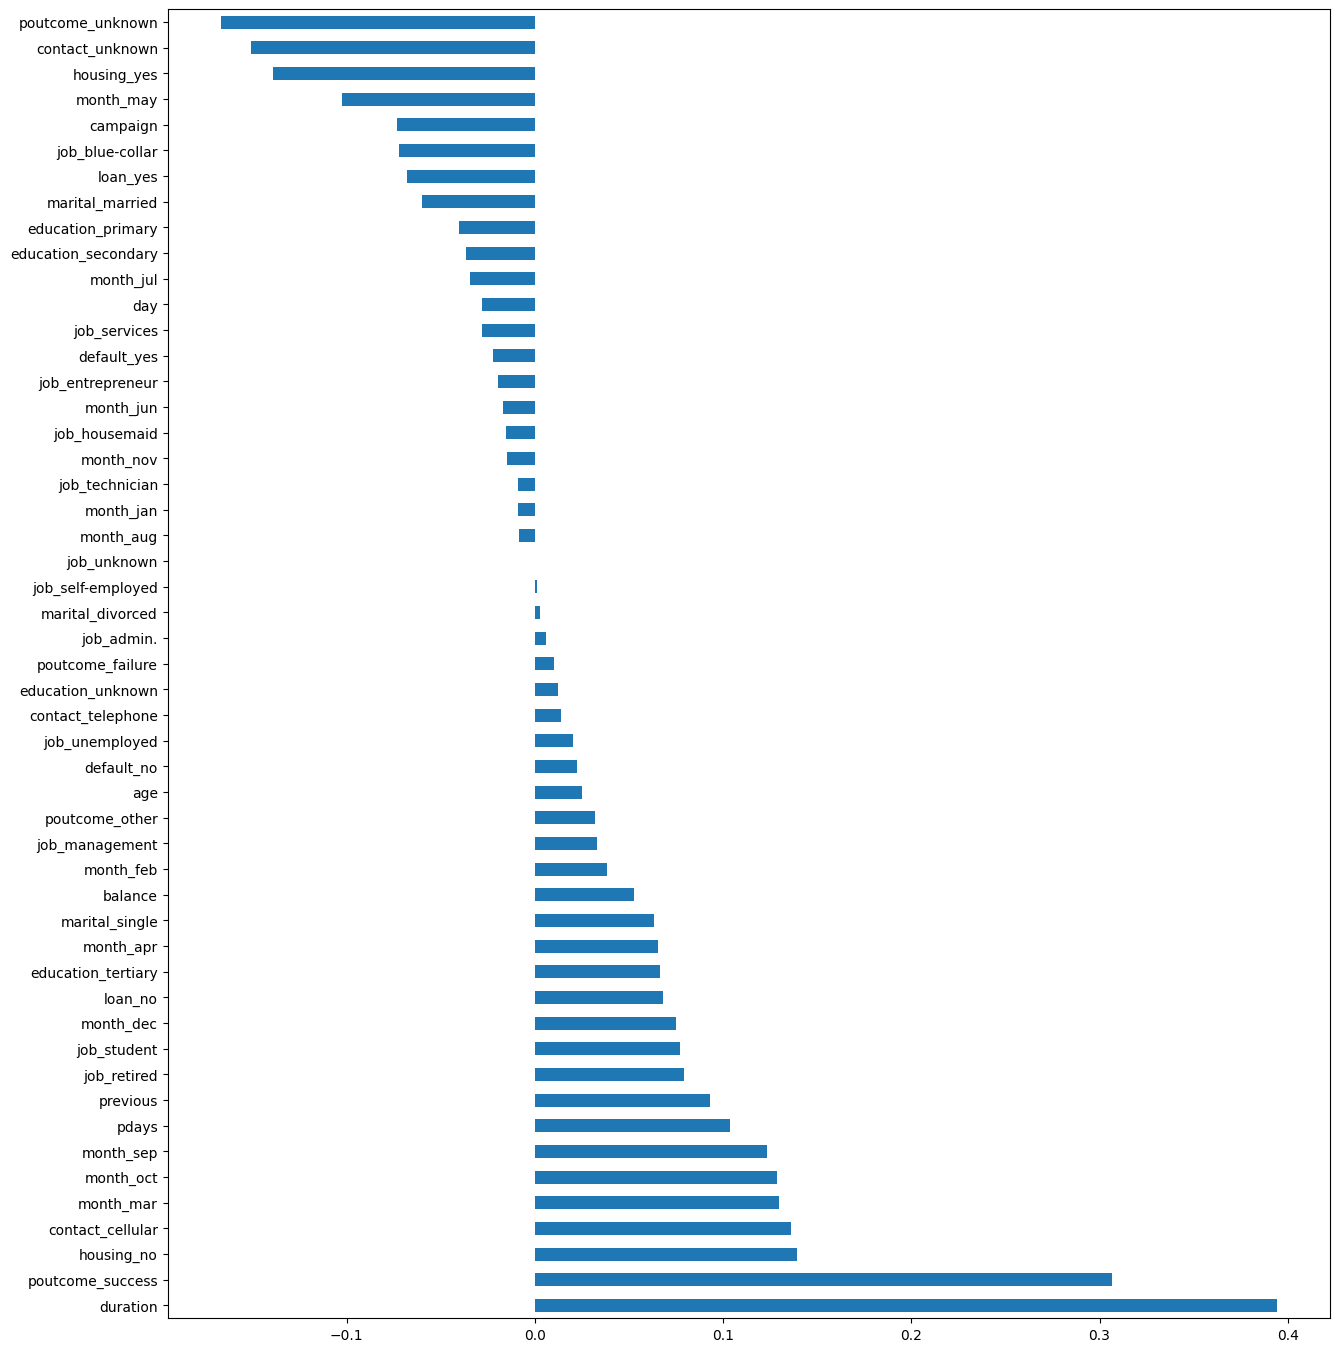

In [ ]:
corr_with_y.plot.barh(figsize=(15, 17))

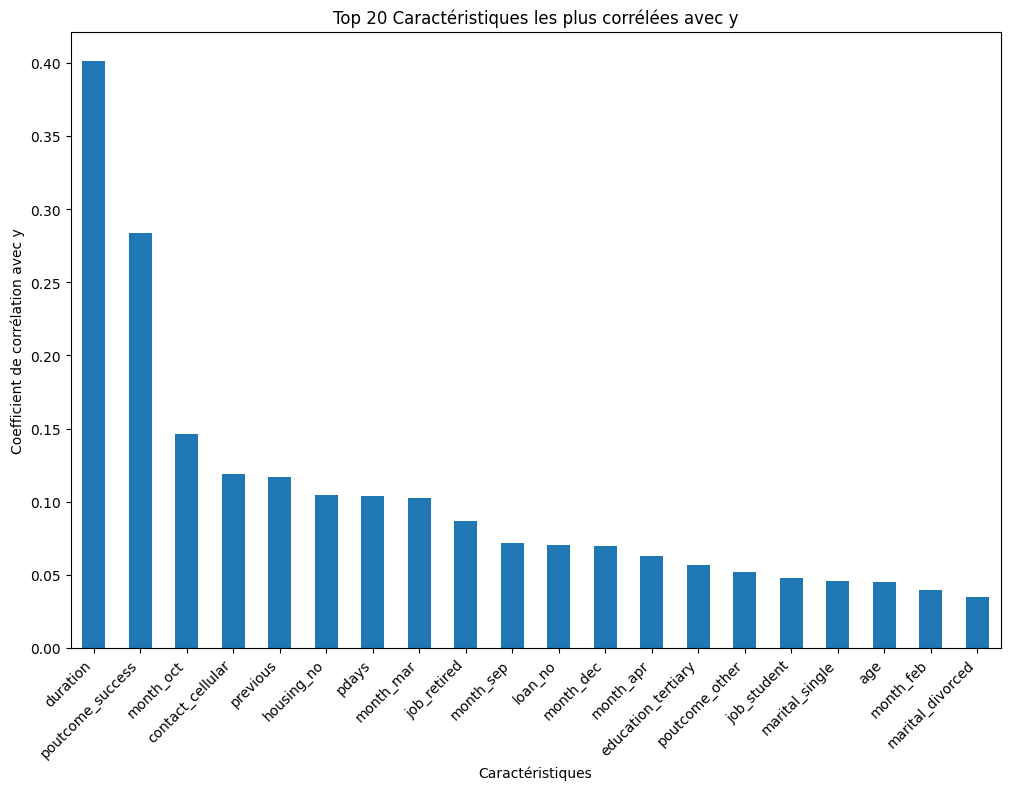

In [ ]:
import matplotlib.pyplot as plt

top_corr = corr_with_y.head(20)

top_corr.plot.bar(figsize=(12,8))
plt.title('Top 20 Caractéristiques les plus corrélées avec y')
plt.xlabel('Caractéristiques')
plt.ylabel('Coefficient de corrélation avec y')
plt.xticks(rotation=45, ha='right')

plt.show()


In [ ]:
print(features_encoded.columns)
print(features_encoded)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')
       age  balance  day  duration  campaign  pdays  previous  job_admin.  \
0       58    

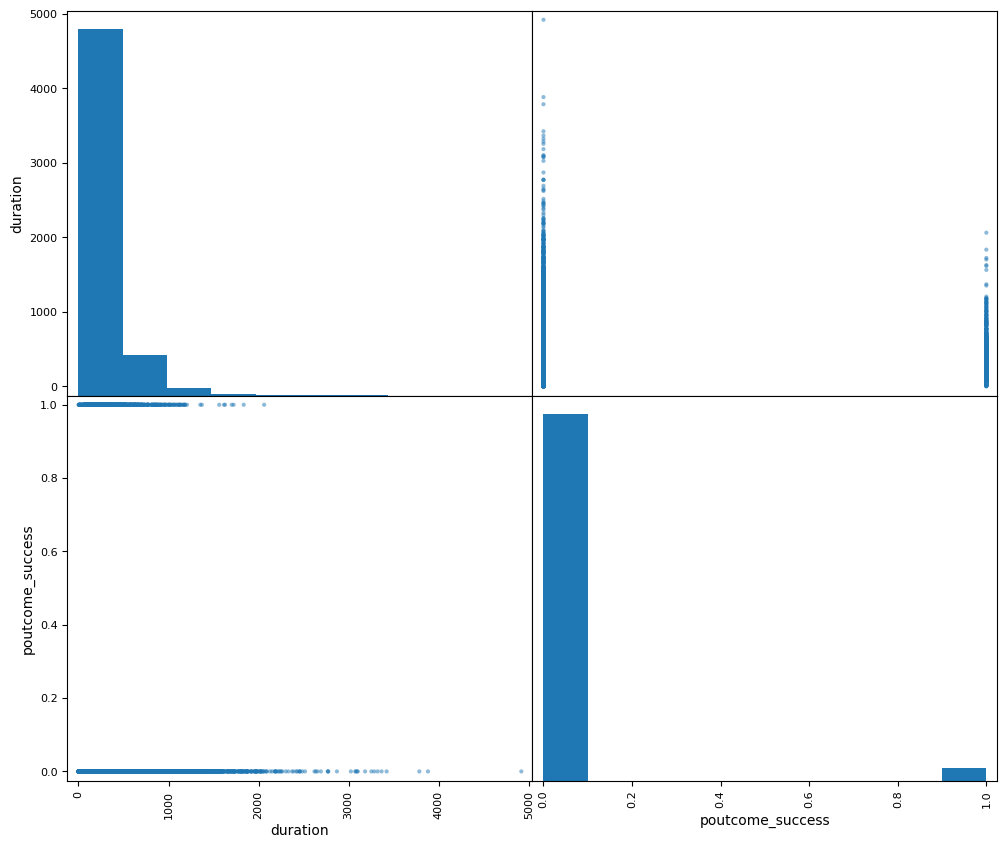

In [ ]:
# Les trois descripteurs les plus corrélées à y sont "duration", "poutcome_success"
FTS = ["duration", "poutcome_success"]
pd.plotting.scatter_matrix(features_encoded[FTS], figsize=(12, 10))
plt.show()

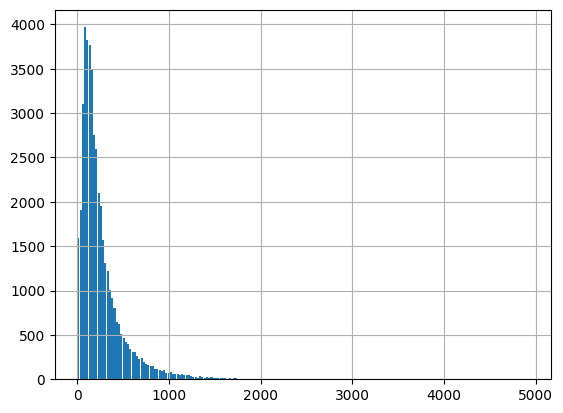

In [ ]:
X['duration'].hist(bins=200, rwidth=0.9)
plt.show()

Voici la matrice de corrélation, on observe une corrélation entre pdays et poutcome (-0.86).

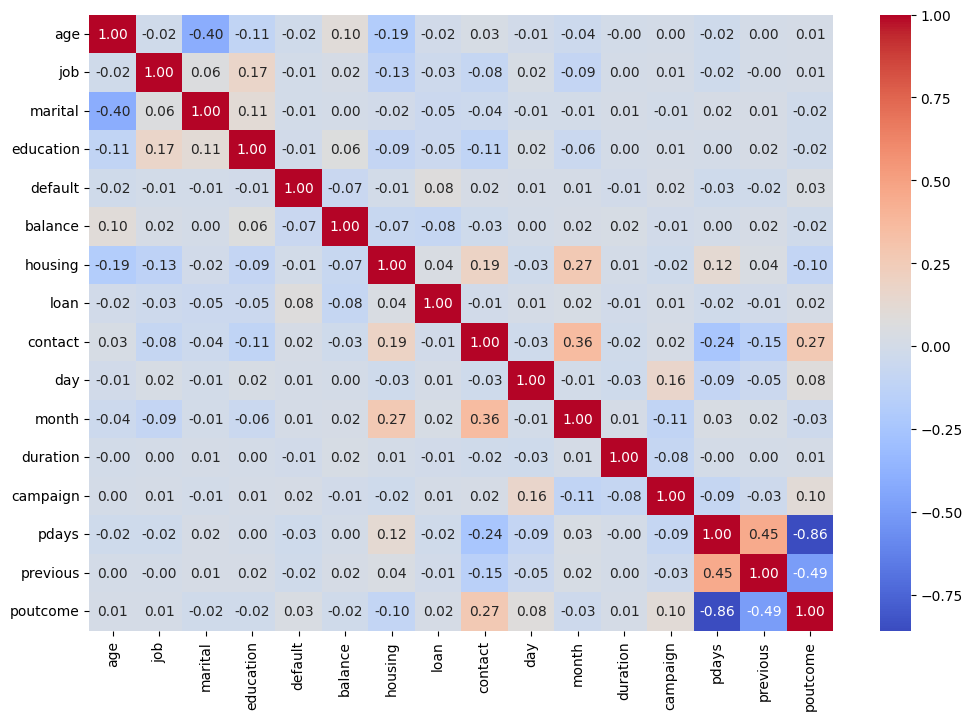

In [ ]:
import seaborn as sns
corr_matrix = x_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

# 4. Pre-traitement

### Traitement du problème des valeurs manquantes (ou non définies, NAN)

In [ ]:
print(X.shape)

(45211, 16)


In [ ]:
x_nans = X.isna().sum() # Même si le sujet nous annonce qu'il n'y a pas de valeurs NaN, par habitude, on effectue un test
x_miss = x_nans[x_nans>0]
x_miss

Series([], dtype: int64)

In [ ]:
x_test_nans = X.isna().sum()
x_test_miss = x_test_nans[x_test_nans > 0]
x_test_miss
print(X.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome  
0  unknown    5   may       261         1     -1         0  unknown  
1  unknown    5   may       151         1     -1         0  unknown  
2  unknown    5   may        76         1     -1         0  unknown  
3  unknown    5   may        92         1     -1         0  unknown  
4  unknown    5   may       198         1     -1         0  unknown  


### Traitement de pdays

In [ ]:
# Créer une nouvelle variable binaire 'contacted_previous' car on a une valeur -1
X['contacted_previous'] = X['pdays'].apply(lambda x: 0 if x == -1 else 1)

# Remplacer les valeurs -1 dans la variable 'pdays' par la médiane excluant les -1
median_pdays = X['pdays'][X['pdays'] != -1].median()
X['pdays'] = X['pdays'].replace(-1, median_pdays)
print(X.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome  \
0  unknown    5   may       261         1    194         0  unknown   
1  unknown    5   may       151         1    194         0  unknown   
2  unknown    5   may        76         1    194         0  unknown   
3  unknown    5   may        92         1    194         0  unknown   
4  unknown    5   may       198         1    194         0  unknown   

   contacted_previous  
0                   0  
1                   0  
2                   0  
3                   0  
4       

### Traitement de balance

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Normalisation avec Min-Max Scaling
scaler = MinMaxScaler()
# Ajout de la valeur absolue du minimum à la colonne "balance"
X['balance'] = X['balance'] - X['balance'].min()
X['balance'] = scaler.fit_transform(X[['balance']])


### Diviser les ensembles d'entraînement et de test

In [ ]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Transformation des données catégorielles en nombres entiers

In [ ]:
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

In [ ]:
X_train_encoded.head(3)

,age,balance,day,duration,campaign,pdays,previous,contacted_previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
3344,41,0.080511,15,72,1,194,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
17965,49,0.085650,30,269,2,194,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18299,42,0.107684,31,130,4,194,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


# 5. Modèles de classification

- Classification
1. KNeighbors
2. Arbre de décision
3. Random Forest
4. Naïve bayésienne
5. Réseau de neurones
6. Régression logique
7. Machine à vecteurs de support (SVM)

- Régression
1. Régréssion lineaire


In [ ]:
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
import warnings

# Ignore les avertissements pour X
warnings.filterwarnings("ignore", category=UserWarning)

### KNeighbors

Knn avec distance d'euclidienne (Temps d'exécution : 30 s)

Pour k=1, Précision : 0.3923, Recall : 0.3721, F1-score : 0.3819
Pour k=3, Précision : 0.5118, Recall : 0.3391, F1-score : 0.4079
Pour k=5, Précision : 0.5383, Recall : 0.3281, F1-score : 0.4077
Pour k=7, Précision : 0.5557, Recall : 0.3153, F1-score : 0.4023
Pour k=9, Précision : 0.5609, Recall : 0.3126, F1-score : 0.4014
Pour k=11, Précision : 0.5606, Recall : 0.3052, F1-score : 0.3953
Pour k=13, Précision : 0.5565, Recall : 0.2979, F1-score : 0.3881
Pour k=15, Précision : 0.5608, Recall : 0.2915, F1-score : 0.3836
Pour k=17, Précision : 0.5653, Recall : 0.2896, F1-score : 0.3830

La meilleure valeur de k est 17 avec une précision de 0.5653

Accuracy : 0.8874267389140772

Classification Report :
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      7952
           1       0.57      0.29      0.38      1091

    accuracy                           0.89      9043
   macro avg       0.74      0.63      0.66      9043
weighted avg       0

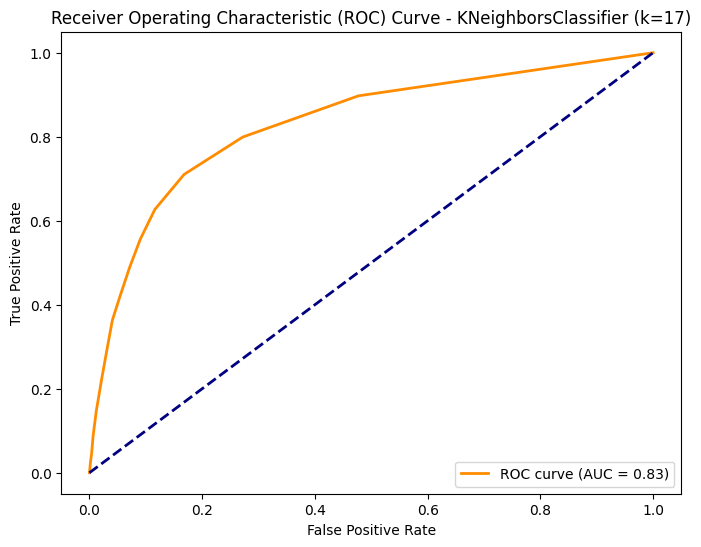


AUC Score (KNeighborsClassifier): 0.8297881929523983


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# On test différents valeurs de k
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17]

# Dictionnaire pour stocker les performances pour chaque valeur de k
performance_dict = {}

for k in k_values:
    # Initialisation et entraînement du classificateur KNeighbors avec la valeur de k actuelle
    model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    model.fit(X_train_encoded, y_train_encoded)

    # Prédictions sur l'ensemble de test
    y_pred = model.predict(X_test_encoded)

    # Calcul des scores de précision, recall et F1-score et stockage dans le dictionnaire
    precision = precision_score(y_test_encoded, y_pred)
    recall = recall_score(y_test_encoded, y_pred)
    f1 = f1_score(y_test_encoded, y_pred)

    performance_dict[k] = {'precision': precision, 'recall': recall, 'f1_score': f1}

    # Affichage des résultats pour chaque valeur de k
    print(f"Pour k={k}, Précision : {precision:.4f}, Recall : {recall:.4f}, F1-score : {f1:.4f}")

# On trouve la meilleure valeur de k en fonction de la performance
best_k = max(performance_dict, key=lambda k: performance_dict[k]['precision'])
print(f"\nLa meilleure valeur de k est {best_k} avec une précision de {performance_dict[best_k]['precision']:.4f}")

# On utiliser la meilleure valeur de k pour entraîner le modèle final
best_model = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
best_model.fit(X_train_encoded, y_train_encoded)

y_pred_proba = best_model.predict_proba(X_test_encoded)

y_pred_best = best_model.predict(X_test_encoded)

# Afficher l'accuracy pour le meilleur modèle
accuracy_best = accuracy_score(y_test_encoded, y_pred_best)
print("\nAccuracy :", accuracy_best)

# Afficher le rapport de classification pour le meilleur modèle
report_best = classification_report(y_test_encoded, y_pred_best)
print("\nClassification Report :\n", report_best)

# ROC
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic (ROC) Curve - KNeighborsClassifier (k={best_k})')
plt.legend(loc="lower right")
plt.show()

# AUC
print("\nAUC Score (KNeighborsClassifier):", roc_auc_score(y_test_encoded, y_pred_proba[:, 1]))


Knn avec distance de Manhattan (Temps d'exécution : 3 min 1 s)

Pour k=1, Précision : 0.4427, Recall : 0.4070, F1-score : 0.4241
Pour k=3, Précision : 0.5387, Recall : 0.3703, F1-score : 0.4389
Pour k=5, Précision : 0.5634, Recall : 0.3419, F1-score : 0.4256
Pour k=7, Précision : 0.5575, Recall : 0.3199, F1-score : 0.4065
Pour k=9, Précision : 0.5615, Recall : 0.3181, F1-score : 0.4061
Pour k=11, Précision : 0.5687, Recall : 0.3034, F1-score : 0.3957
Pour k=13, Précision : 0.5755, Recall : 0.2933, F1-score : 0.3886
Pour k=15, Précision : 0.5824, Recall : 0.2979, F1-score : 0.3942
Pour k=17, Précision : 0.5683, Recall : 0.2896, F1-score : 0.3837

La meilleure valeur de k est 15 avec une précision de 0.5824

Accuracy : 0.8895278115669578

Classification Report :
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      7952
           1       0.58      0.30      0.39      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.63      0.67      9043
weighted avg       0

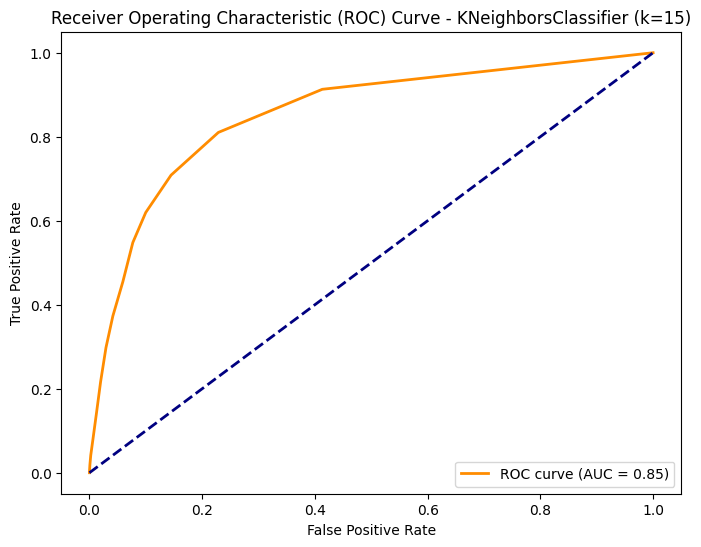


AUC Score (KNeighborsClassifier): 0.8522216018383444


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# On test différents valeurs de k
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17]

# Dictionnaire pour stocker les performances pour chaque valeur de k
performance_dict = {}

for k in k_values:
    # Initialisation et entraînement du classificateur KNeighbors avec la valeur de k actuelle
    model = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    model.fit(X_train_encoded, y_train_encoded)

    # Prédictions sur l'ensemble de test
    y_pred = model.predict(X_test_encoded)

    # Calcul des scores de précision, recall et F1-score et stockage dans le dictionnaire
    precision = precision_score(y_test_encoded, y_pred)
    recall = recall_score(y_test_encoded, y_pred)
    f1 = f1_score(y_test_encoded, y_pred)

    performance_dict[k] = {'precision': precision, 'recall': recall, 'f1_score': f1}

    # Affichage des résultats pour chaque valeur de k
    print(f"Pour k={k}, Précision : {precision:.4f}, Recall : {recall:.4f}, F1-score : {f1:.4f}")

# On trouve la meilleure valeur de k en fonction de la performance
best_k = max(performance_dict, key=lambda k: performance_dict[k]['precision'])
print(f"\nLa meilleure valeur de k est {best_k} avec une précision de {performance_dict[best_k]['precision']:.4f}")

# On utiliser la meilleure valeur de k pour entraîner le modèle final
best_model = KNeighborsClassifier(n_neighbors=best_k, metric='manhattan')
best_model.fit(X_train_encoded, y_train_encoded)

# Predict probabilities for positive class (for ROC curve)
y_pred_proba = best_model.predict_proba(X_test_encoded)

y_pred_best = best_model.predict(X_test_encoded)

# Afficher l'accuracy pour le meilleur modèle
accuracy_best = accuracy_score(y_test_encoded, y_pred_best)
print("\nAccuracy :", accuracy_best)

# Afficher le rapport de classification pour le meilleur modèle
report_best = classification_report(y_test_encoded, y_pred_best)
print("\nClassification Report :\n", report_best)

# ROC
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic (ROC) Curve - KNeighborsClassifier (k={best_k})')
plt.legend(loc="lower right")
plt.show()

# AUC
print("\nAUC Score (KNeighborsClassifier):", roc_auc_score(y_test_encoded, y_pred_proba[:, 1]))


Knn avec distance de Minkowski (Temps d'exécution : 21s)

Pour k=1, Précision : 0.3923, Recall : 0.3721, F1-score : 0.3819
Pour k=3, Précision : 0.5118, Recall : 0.3391, F1-score : 0.4079
Pour k=5, Précision : 0.5383, Recall : 0.3281, F1-score : 0.4077
Pour k=7, Précision : 0.5557, Recall : 0.3153, F1-score : 0.4023
Pour k=9, Précision : 0.5609, Recall : 0.3126, F1-score : 0.4014
Pour k=11, Précision : 0.5606, Recall : 0.3052, F1-score : 0.3953
Pour k=13, Précision : 0.5565, Recall : 0.2979, F1-score : 0.3881
Pour k=15, Précision : 0.5608, Recall : 0.2915, F1-score : 0.3836
Pour k=17, Précision : 0.5653, Recall : 0.2896, F1-score : 0.3830

La meilleure valeur de k est 17 avec une précision de 0.5653

Accuracy : 0.8874267389140772

Classification Report :
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      7952
           1       0.57      0.29      0.38      1091

    accuracy                           0.89      9043
   macro avg       0.74      0.63      0.66      9043
weighted avg       0

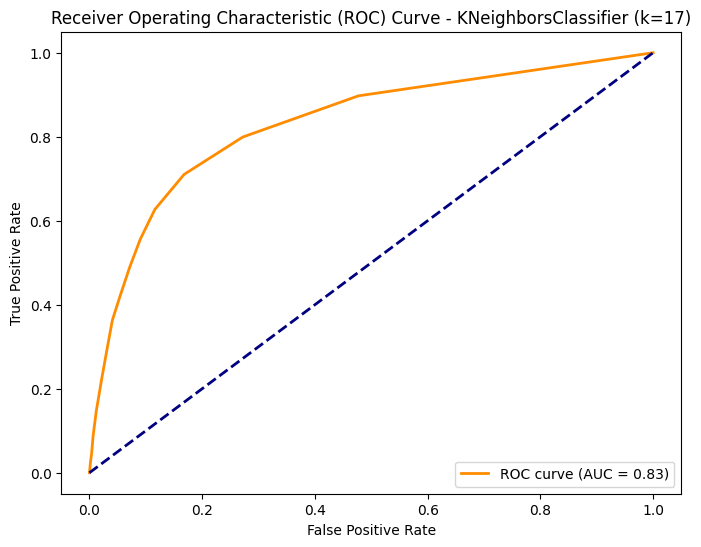


AUC Score (KNeighborsClassifier): 0.8297881929523983


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# On test différents valeurs de k
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17]

# Dictionnaire pour stocker les performances pour chaque valeur de k
performance_dict = {}

for k in k_values:
    # Initialisation et entraînement du classificateur KNeighbors avec la valeur de k actuelle
    model = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    model.fit(X_train_encoded, y_train_encoded)

    # Prédictions sur l'ensemble de test
    y_pred = model.predict(X_test_encoded)

    # Calcul des scores de précision, recall et F1-score et stockage dans le dictionnaire
    precision = precision_score(y_test_encoded, y_pred)
    recall = recall_score(y_test_encoded, y_pred)
    f1 = f1_score(y_test_encoded, y_pred)

    performance_dict[k] = {'precision': precision, 'recall': recall, 'f1_score': f1}

    # Affichage des résultats pour chaque valeur de k
    print(f"Pour k={k}, Précision : {precision:.4f}, Recall : {recall:.4f}, F1-score : {f1:.4f}")

# On trouve la meilleure valeur de k en fonction de la performance
best_k = max(performance_dict, key=lambda k: performance_dict[k]['precision'])
print(f"\nLa meilleure valeur de k est {best_k} avec une précision de {performance_dict[best_k]['precision']:.4f}")

# On utiliser la meilleure valeur de k pour entraîner le modèle final
best_model = KNeighborsClassifier(n_neighbors=best_k, metric='minkowski')
best_model.fit(X_train_encoded, y_train_encoded)

# Predict probabilities for positive class (for ROC curve)
y_pred_proba = best_model.predict_proba(X_test_encoded)

y_pred_best = best_model.predict(X_test_encoded)

# Afficher l'accuracy pour le meilleur modèle
accuracy_best = accuracy_score(y_test_encoded, y_pred_best)
print("\nAccuracy :", accuracy_best)

# Afficher le rapport de classification pour le meilleur modèle
report_best = classification_report(y_test_encoded, y_pred_best)
print("\nClassification Report :\n", report_best)

# ROC
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic (ROC) Curve - KNeighborsClassifier (k={best_k})')
plt.legend(loc="lower right")
plt.show()

# AUC
print("\nAUC Score (KNeighborsClassifier):", roc_auc_score(y_test_encoded, y_pred_proba[:, 1]))

Knn avec distance de Chebyshev (Temps d'exécution : 1 min 44 s)

Pour k=1, Précision : 0.3686, Recall : 0.3611, F1-score : 0.3648
Pour k=3, Précision : 0.4753, Recall : 0.3346, F1-score : 0.3927
Pour k=5, Précision : 0.5213, Recall : 0.3254, F1-score : 0.4007
Pour k=7, Précision : 0.5362, Recall : 0.3126, F1-score : 0.3949
Pour k=9, Précision : 0.5550, Recall : 0.3006, F1-score : 0.3900
Pour k=11, Précision : 0.5668, Recall : 0.3071, F1-score : 0.3983
Pour k=13, Précision : 0.5669, Recall : 0.2951, F1-score : 0.3882
Pour k=15, Précision : 0.5613, Recall : 0.2896, F1-score : 0.3821
Pour k=17, Précision : 0.5742, Recall : 0.2979, F1-score : 0.3923

La meilleure valeur de k est 17 avec une précision de 0.5742

Accuracy : 0.8886431493973239

Classification Report :
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      7952
           1       0.57      0.30      0.39      1091

    accuracy                           0.89      9043
   macro avg       0.74      0.63      0.67      9043
weighted avg       0

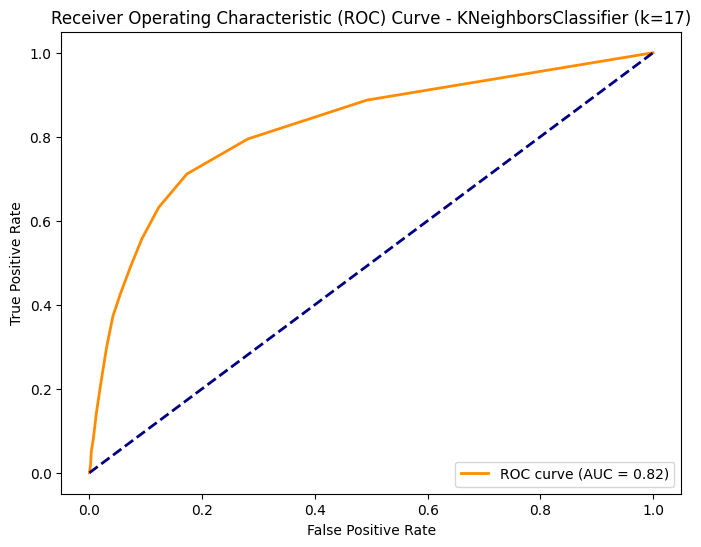


AUC Score (KNeighborsClassifier): 0.8222807859992218


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# On test différents valeurs de k
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17]

# Dictionnaire pour stocker les performances pour chaque valeur de k
performance_dict = {}

for k in k_values:
    # Initialisation et entraînement du classificateur KNeighbors avec la valeur de k actuelle
    model = KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
    model.fit(X_train_encoded, y_train_encoded)

    # Prédictions sur l'ensemble de test
    y_pred = model.predict(X_test_encoded)

    # Calcul des scores de précision, recall et F1-score et stockage dans le dictionnaire
    precision = precision_score(y_test_encoded, y_pred)
    recall = recall_score(y_test_encoded, y_pred)
    f1 = f1_score(y_test_encoded, y_pred)

    performance_dict[k] = {'precision': precision, 'recall': recall, 'f1_score': f1}

    # Affichage des résultats pour chaque valeur de k
    print(f"Pour k={k}, Précision : {precision:.4f}, Recall : {recall:.4f}, F1-score : {f1:.4f}")

# On trouve la meilleure valeur de k en fonction de la performance
best_k = max(performance_dict, key=lambda k: performance_dict[k]['precision'])
print(f"\nLa meilleure valeur de k est {best_k} avec une précision de {performance_dict[best_k]['precision']:.4f}")

# On utiliser la meilleure valeur de k pour entraîner le modèle final
best_model = KNeighborsClassifier(n_neighbors=best_k, metric='chebyshev')
best_model.fit(X_train_encoded, y_train_encoded)

# Predict probabilities for positive class (for ROC curve)
y_pred_proba = best_model.predict_proba(X_test_encoded)

y_pred_best = best_model.predict(X_test_encoded)

# Afficher l'accuracy pour le meilleur modèle
accuracy_best = accuracy_score(y_test_encoded, y_pred_best)
print("\nAccuracy :", accuracy_best)

# Afficher le rapport de classification pour le meilleur modèle
report_best = classification_report(y_test_encoded, y_pred_best)
print("\nClassification Report :\n", report_best)

# ROC
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic (ROC) Curve - KNeighborsClassifier (k={best_k})')
plt.legend(loc="lower right")
plt.show()

# AUC
print("\nAUC Score (KNeighborsClassifier):", roc_auc_score(y_test_encoded, y_pred_proba[:, 1]))

#### Réflexion et remarque

Dans l'algorithme KNN, nous avons exploré plusieurs métriques de distance, notamment la distance euclidienne, la distance de Manhattan, la distance de Chebyshev et la distance de Minkowski.

On remarque que l'algorithme parvient bien à distinguer la classification "non" avec une précision moyenne de 0.91. Cependant, sa performance est moins satisfaisante pour la distinction des classifications "oui".



*   Euclidienne: Accuracy = 0.88, precision (classe 1) = 0.57 et AUC = 0.83
*   Manhathan: Accuracy = 0.88, precision (classe 1) = 0.58 et AUC = 0.85
*   Minkowski: Accuracy = 0.88, precision (classe 1) = 0.57 et AUC = 0.83
*   Chebyshev: Accuracy = 0.88, precione (classe 1) = 0.57 et AUC = 0.82

En termes de performance comme l'accuracy, précision, recall et l'AUC, la distance euclidienne, distance de Minkowski et distance de Chebyshev donnent des performances similaires, tandis qu'en termes d'AUC, la distance de Manhattan montre une meilleure performance.

En identifiant que la distance de Manhattan offre les meilleures performances, nous avons choisi d'utiliser K-means pour diviser les données en plusieurs clusters et de le tester sur cet algorithme. Nous observons une légère amélioration au niveau de l'AUC et de la précision pour la classe 1. Cependant, nous avons également constaté une diminution de la précision pour la classe 0 et du score F1.


Knn avec distance de Manhattan et kmeans (Temps d'exécution : 3 min 36 s)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pour k=1 et cluster=0, Précision : 0.3238, Recall : 0.3831, F1-score : 0.3510
Pour k=1 et cluster=1, Précision : 0.1292, Recall : 0.5445, F1-score : 0.2088
Pour k=1 et cluster=2, Précision : 0.4014, Recall : 0.2090, F1-score : 0.2749
Pour k=3 et cluster=0, Précision : 0.4302, Recall : 0.3025, F1-score : 0.3552
Pour k=3 et cluster=1, Précision : 0.1316, Recall : 0.5435, F1-score : 0.2119
Pour k=3 et cluster=2, Précision : 0.5640, Recall : 0.1778, F1-score : 0.2704
Pour k=5 et cluster=0, Précision : 0.4935, Recall : 0.2777, F1-score : 0.3554
Pour k=5 et cluster=1, Précision : 0.1343, Recall : 0.5527, F1-score : 0.2161
Pour k=5 et cluster=2, Précision : 0.6203, Recall : 0.1512, F1-score : 0.2432
Pour k=7 et cluster=0, Précision : 0.5271, Recall : 0.2493, F1-score : 0.3385
Pour k=7 et cluster=1, Précision : 0.1274, Recall : 0.5371, F1-score : 0.2060
Pour k=7 et cluster=2, Précision : 0.6515, Recall : 0.1439, F1-score : 0.2357
Pour k=9 et cluster=0, Précision : 0.5408, Recall : 0.2246, F1-s

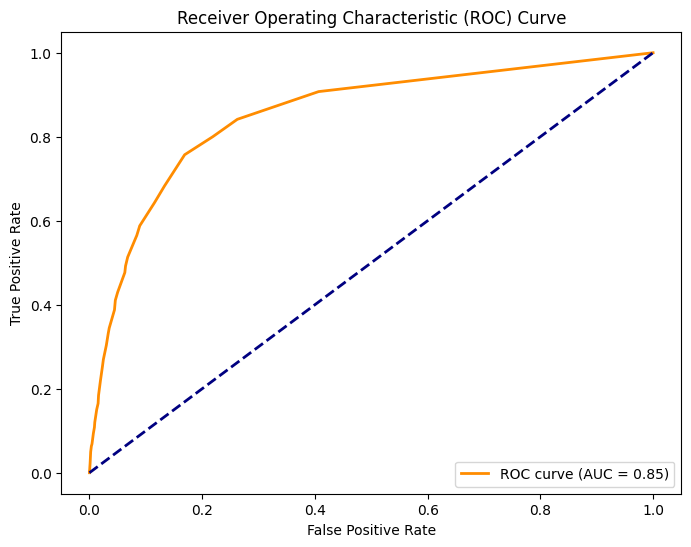


AUC Score (Final Model): 0.8528248431929801


In [ ]:
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

# Clustering avec KMeans
n_clusters = 3
kmeans_model = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_model.fit(X_train_encoded)

X_train_with_clusters = X_train_encoded.copy()
X_train_with_clusters['cluster'] = kmeans_model.labels_

# Classification avec k-NN dans chaque cluster
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17]

# Dictionnaire pour stocker les performances pour chaque valeur de k
performance_dict = {}

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k, metric='manhattan')

    # Filtrer les données d'entraînement pour le cluster actuel
    for cluster_label in range(n_clusters):
        X_train_cluster = X_train_with_clusters[X_train_with_clusters['cluster'] == cluster_label]
        y_train_cluster = y_train_encoded[X_train_with_clusters['cluster'] == cluster_label]

        # S'il y a des exemples dans le cluster, entraînez le modèle et évaluez-le
        if not X_train_cluster.empty:
            model.fit(X_train_cluster.drop('cluster', axis=1), y_train_cluster)
            y_pred = model.predict(X_test_encoded)

            # Calcul des scores de précision, recall et F1-score et stockage dans le dictionnaire
            precision = precision_score(y_test_encoded, y_pred)
            recall = recall_score(y_test_encoded, y_pred)
            f1 = f1_score(y_test_encoded, y_pred)

            performance_dict[(k, cluster_label)] = {'precision': precision, 'recall': recall, 'f1_score': f1}

            # Affichage des résultats pour chaque valeur de k et chaque cluster
            print(f"Pour k={k} et cluster={cluster_label}, Précision : {precision:.4f}, Recall : {recall:.4f}, F1-score : {f1:.4f}")

# Choisissez la meilleure valeur de k pour chaque cluster en fonction de la performance
best_k_values = {}
for cluster_label in range(n_clusters):
    best_k_cluster = max([(k, cluster_label) for k, c_label in performance_dict.keys() if c_label == cluster_label],
                         key=lambda x: performance_dict[x]['precision'])
    best_k_values[cluster_label] = best_k_cluster[0]

# Utiliser la meilleure valeur de k pour chaque cluster et entraîner le modèle final
final_models = {}
for cluster_label, best_k in best_k_values.items():
    X_train_cluster = X_train_with_clusters[X_train_with_clusters['cluster'] == cluster_label]
    y_train_cluster = y_train_encoded[X_train_with_clusters['cluster'] == cluster_label]

    final_model = KNeighborsClassifier(n_neighbors=best_k, metric='manhattan')
    final_model.fit(X_train_cluster.drop('cluster', axis=1), y_train_cluster)
    final_models[cluster_label] = final_model

# Prédictions sur l'ensemble de test en utilisant les modèles finaux pour chaque cluster
y_pred_final = []
for _, row in X_test_encoded.iterrows():
    cluster_label = kmeans_model.predict([row])[0]
    final_model = final_models[cluster_label]
    y_pred_final.append(final_model.predict([row])[0])

# Évaluation du modèle final
accuracy_final = accuracy_score(y_test_encoded, y_pred_final)
print("\nAccuracy du modèle final :", accuracy_final)

report_final = classification_report(y_test_encoded, y_pred_final)
print("\nClassification Report du modèle final :\n", report_final)

# Calcul des scores de probabilité pour chaque classe
y_pred_proba_final = []

for _, row in X_test_encoded.iterrows():
    cluster_label = kmeans_model.predict([row])[0]
    final_model = final_models[cluster_label]
    proba = final_model.predict_proba([row])[0][1]
    y_pred_proba_final.append(proba)

# Calcul de la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_proba_final)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Afficher l'AUC
print("\nAUC Score (Final Model):", roc_auc_score(y_test_encoded, y_pred_proba_final))

### Arbre de décision

Avec le critère d'entropie (On cherche d'abord la valeur de max_depth_valeurs pour ensuite l'utiliser afin d'avoir les meilleurs performances possibles)
(Temps d'exécution : 37 s)

Meilleure profondeur maximale: 4
Précision pour la meilleure profondeur maximale: 0.6427


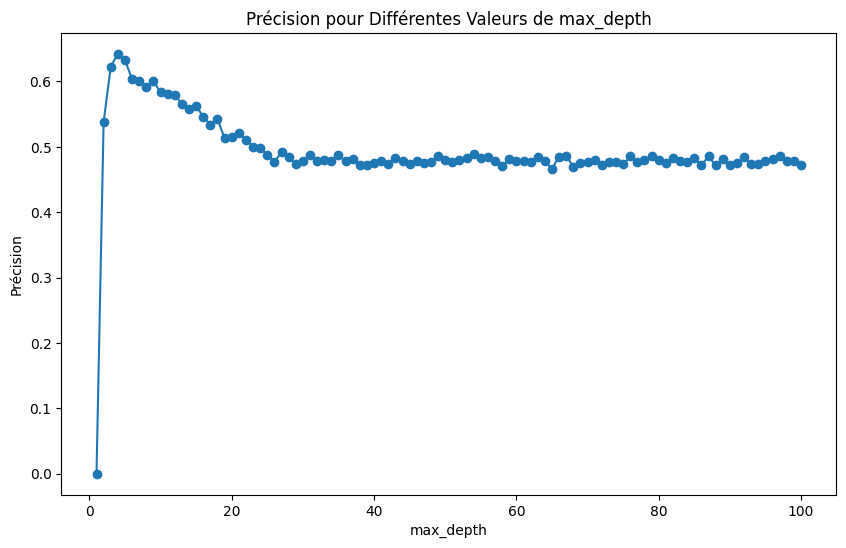

Précision: 0.8943

Rapport de Classification (Classificateur d'Arbre de Décision):
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7952
           1       0.64      0.28      0.39      1091

    accuracy                           0.89      9043
   macro avg       0.78      0.63      0.67      9043
weighted avg       0.88      0.89      0.88      9043



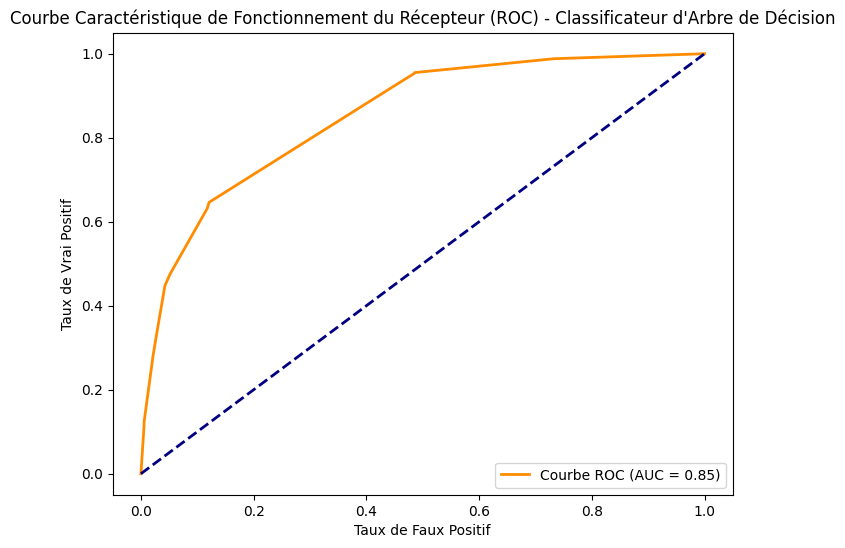


Score AUC (Classificateur d'Arbre de Décision): 0.8515791126225732


In [ ]:
from sklearn.tree import DecisionTreeClassifier

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

max_depth_values = list(range(1, 101))

results_dict = {}

# Trouver la meilleure profondeur maximale basée sur la précision
best_max_depth = 0
best_precision = 0

for max_depth_val in max_depth_values:
    # Créer et ajuster le modèle avec la valeur actuelle de max_depth
    model = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth_val)
    model.fit(X_train_encoded, y_train_encoded)

    # Faire des prédictions sur l'ensemble de test
    y_pred = model.predict(X_test_encoded)

    # Calculer la précision et stocker les résultats
    precision = precision_score(y_test_encoded, y_pred)
    results_dict[max_depth_val] = precision

    # Mettre à jour best_max_depth si une meilleure précision est trouvée
    if precision > best_precision:
        best_precision = precision
        best_max_depth = max_depth_val

# Afficher les résultats pour la meilleure profondeur maximale
print(f"Meilleure profondeur maximale: {best_max_depth}")
print(f"Précision pour la meilleure profondeur maximale: {best_precision:.4f}")

# Tracer la précision pour différentes valeurs de max_depth
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, [results_dict[val] for val in max_depth_values], marker='o')
plt.xlabel('max_depth')
plt.ylabel('Précision')
plt.title('Précision pour Différentes Valeurs de max_depth')
plt.show()

# Créer et ajuster le modèle final avec la meilleure profondeur maximale
model_final = DecisionTreeClassifier(criterion="entropy", max_depth=best_max_depth)
model_final.fit(X_train_encoded, y_train_encoded)

# Prédictions de probabilités pour la classe positive (pour la courbe ROC)
y_pred_proba_final = model_final.predict_proba(X_test_encoded)

# Obtenir les étiquettes prédites
y_pred_final = model_final.predict(X_test_encoded)

# Rapport de classification pour le classificateur d'arbre de décision
score_final = accuracy_score(y_test_encoded, y_pred_final)
result_final = classification_report(y_test_encoded, y_pred_final)
print(f"Précision: {score_final:.4f}")
print("\nRapport de Classification (Classificateur d'Arbre de Décision):\n", result_final)

# Courbe ROC et AUC pour le classificateur d'arbre de décision
fpr_final, tpr_final, thresholds_final = roc_curve(y_test_encoded, y_pred_proba_final[:, 1])
roc_auc_final = auc(fpr_final, tpr_final)

# La courbe ROC pour le classificateur d'arbre de décision
plt.figure(figsize=(8, 6))
plt.plot(fpr_final, tpr_final, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc_final:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taux de Faux Positif')
plt.ylabel('Taux de Vrai Positif')
plt.title('Courbe Caractéristique de Fonctionnement du Récepteur (ROC) - Classificateur d\'Arbre de Décision')
plt.legend(loc="lower right")
plt.show()

# AUC
print("\nScore AUC (Classificateur d'Arbre de Décision):", roc_auc_score(y_test_encoded, y_pred_proba_final[:, 1]))


Avec le coéfficient de Gini (On cherche d'abord la valeur de max_depth_valeurs pour ensuite l'utiliser afin d'avoir les meilleurs performances possibles)
(Temps d'exécution : 39 s)

Meilleure profondeur maximale: 3
Précision pour la meilleure profondeur maximale: 0.6500


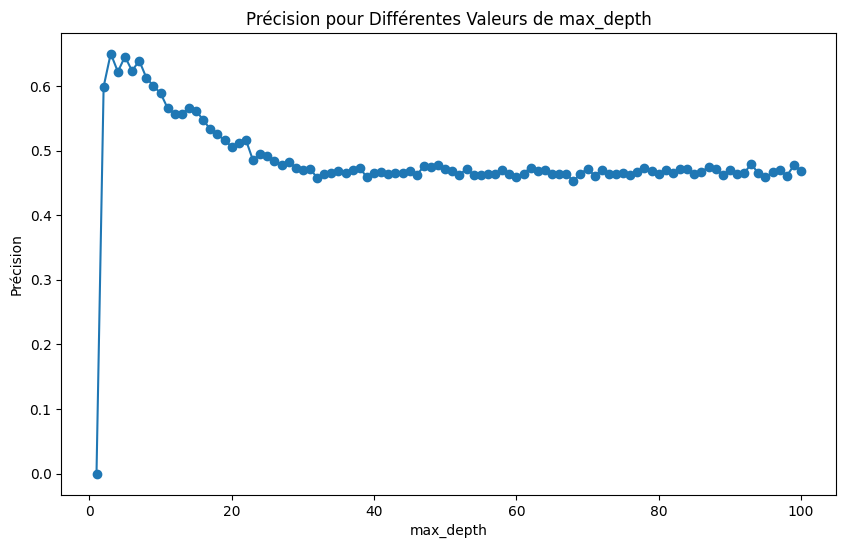

Précision: 0.8959

Rapport de Classification (Classificateur d'Arbre de Décision):
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7952
           1       0.65      0.30      0.41      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.64      0.68      9043
weighted avg       0.88      0.90      0.88      9043



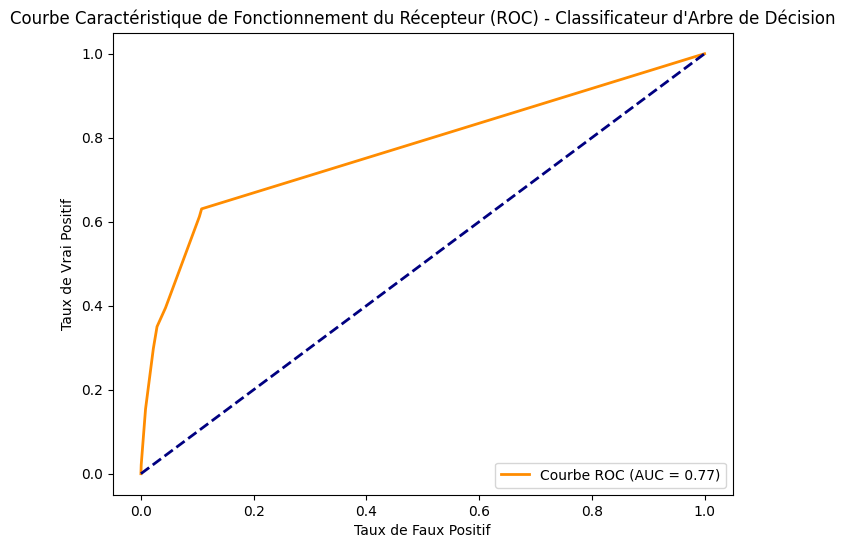


Score AUC (Classificateur d'Arbre de Décision): 0.7717846377070858


In [ ]:
from sklearn.tree import DecisionTreeClassifier

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

max_depth_values = list(range(1, 101))

results_dict = {}

# Trouver la meilleure profondeur maximale basée sur la précision
best_max_depth = 0
best_precision = 0

for max_depth_val in max_depth_values:
    # Créer et ajuster le modèle avec la valeur actuelle de max_depth
    model = DecisionTreeClassifier(criterion="gini", max_depth=max_depth_val)
    model.fit(X_train_encoded, y_train_encoded)

    # Faire des prédictions sur l'ensemble de test
    y_pred = model.predict(X_test_encoded)

    # Calculer la précision et stocker les résultats
    precision = precision_score(y_test_encoded, y_pred)
    results_dict[max_depth_val] = precision

    # Mettre à jour best_max_depth si une meilleure précision est trouvée
    if precision > best_precision:
        best_precision = precision
        best_max_depth = max_depth_val

# Afficher les résultats pour la meilleure profondeur maximale
print(f"Meilleure profondeur maximale: {best_max_depth}")
print(f"Précision pour la meilleure profondeur maximale: {best_precision:.4f}")

# Tracer la précision pour différentes valeurs de max_depth
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, [results_dict[val] for val in max_depth_values], marker='o')
plt.xlabel('max_depth')
plt.ylabel('Précision')
plt.title('Précision pour Différentes Valeurs de max_depth')
plt.show()

# Créer et ajuster le modèle final avec la meilleure profondeur maximale
model_final = DecisionTreeClassifier(criterion="gini", max_depth=best_max_depth)
model_final.fit(X_train_encoded, y_train_encoded)

# Prédictions de probabilités pour la classe positive (pour la courbe ROC)
y_pred_proba_final = model_final.predict_proba(X_test_encoded)

# Obtenir les étiquettes prédites
y_pred_final = model_final.predict(X_test_encoded)

# Rapport de classification pour le classificateur d'arbre de décision
score_final = accuracy_score(y_test_encoded, y_pred_final)
result_final = classification_report(y_test_encoded, y_pred_final)
print(f"Précision: {score_final:.4f}")
print("\nRapport de Classification (Classificateur d'Arbre de Décision):\n", result_final)

# Courbe ROC et AUC pour le classificateur d'arbre de décision
fpr_final, tpr_final, thresholds_final = roc_curve(y_test_encoded, y_pred_proba_final[:, 1])
roc_auc_final = auc(fpr_final, tpr_final)

# La courbe ROC pour le classificateur d'arbre de décision
plt.figure(figsize=(8, 6))
plt.plot(fpr_final, tpr_final, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc_final:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taux de Faux Positif')
plt.ylabel('Taux de Vrai Positif')
plt.title('Courbe Caractéristique de Fonctionnement du Récepteur (ROC) - Classificateur d\'Arbre de Décision')
plt.legend(loc="lower right")
plt.show()

# AUC
print("\nScore AUC (Classificateur d'Arbre de Décision):", roc_auc_score(y_test_encoded, y_pred_proba_final[:, 1]))


#### Réflexion et remarque

On remarque que cet algorithme distingue mieux la classification des "oui" et affiche une meilleure AUC par rapport à l'algorithme KNeighbors.
*   Entropie: précision (classe 1) = 0.64 et AUC = 0.85
*   Gini: précision (classe 1) = 0.65 et AUC = 0.77

L'arbre de décision avec l'entrepie est légèrement meilleur en regard de l'AUC et du f1-score.

De plus, de façon général, le recall (classe 1) est aussi meilleur que ce celui de knn.




### Random Forest

Avec le critère d'entropie (On cherche d'abord la valeur de max_depth_valeurs pour ensuite l'utiliser afin d'avoir les meilleurs performances possibles)
(Temps d'exécution : 6 min 20 s)

Meilleur max_depth : 4
Précision pour le meilleur max_depth : 0.8444


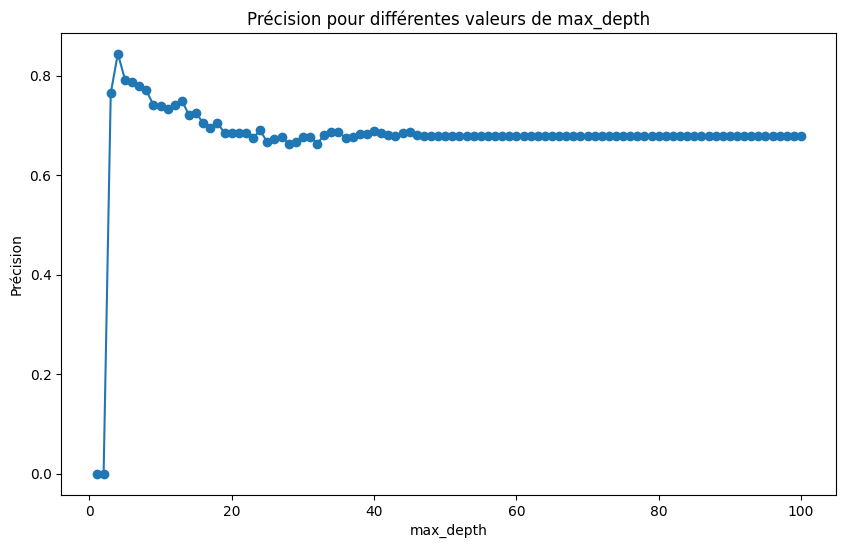

Précision : 0.8896

Rapport de classification (Random Forest Classifier):
               precision    recall  f1-score   support

           0       0.89      1.00      0.94      7952
           1       0.84      0.10      0.19      1091

    accuracy                           0.89      9043
   macro avg       0.87      0.55      0.56      9043
weighted avg       0.88      0.89      0.85      9043



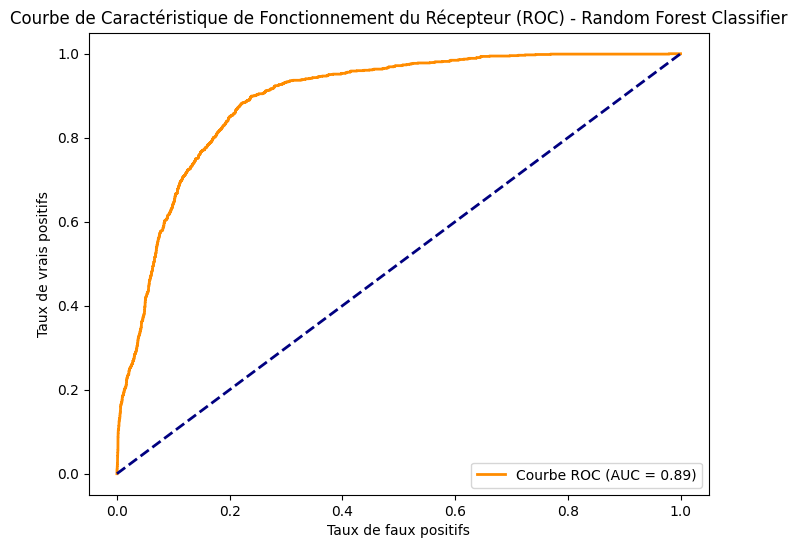


Score AUC (Random Forest Classifier) : 0.8927932282051614


In [ ]:
from sklearn.ensemble import RandomForestClassifier

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Plage de valeurs de max_depth à tester
max_depth_values = list(range(1, 101))

# Dictionnaire pour stocker les résultats
results_dict = {}

# Recherche du meilleur max_depth basé sur la précision
best_max_depth = 0
best_precision = 0

for max_depth_val in max_depth_values:
    # Création et ajustement du modèle Random Forest avec la valeur max_depth actuelle
    model = RandomForestClassifier(n_estimators=100, criterion="entropy", max_depth=max_depth_val, random_state=42)
    model.fit(X_train_encoded, y_train_encoded)

    # Prédictions sur l'ensemble de test
    y_pred = model.predict(X_test_encoded)

    # Calcul de la précision et stockage des résultats
    precision = precision_score(y_test_encoded, y_pred)
    results_dict[max_depth_val] = precision

    # Mise à jour de best_max_depth si une précision plus élevée est trouvée
    if precision > best_precision:
        best_precision = precision
        best_max_depth = max_depth_val

# Affichage des résultats pour le meilleur max_depth
print(f"Meilleur max_depth : {best_max_depth}")
print(f"Précision pour le meilleur max_depth : {results_dict[best_max_depth]:.4f}")

# Tracé de la précision pour différentes valeurs de max_depth
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, [results_dict[val] for val in max_depth_values], marker='o')
plt.xlabel('max_depth')
plt.ylabel('Précision')
plt.title('Précision pour différentes valeurs de max_depth')
plt.show()

# Création et ajustement du modèle Random Forest final avec le meilleur max_depth
model_final = RandomForestClassifier(n_estimators=100, criterion="entropy", max_depth=best_max_depth, random_state=42)
model_final.fit(X_train_encoded, y_train_encoded)

# Prédictions de probabilités pour la classe positive (pour la courbe ROC)
y_pred_proba_final = model_final.predict_proba(X_test_encoded)

# Obtention des étiquettes prédites
y_pred_final = model_final.predict(X_test_encoded)

# Rapport de classification pour le classifieur Random Forest
score_final = accuracy_score(y_test_encoded, y_pred_final)
result_final = classification_report(y_test_encoded, y_pred_final)
print(f"Précision : {score_final:.4f}")
print("\nRapport de classification (Random Forest Classifier):\n", result_final)

# Courbe ROC et AUC pour le classifieur Random Forest
fpr_final, tpr_final, thresholds_final = roc_curve(y_test_encoded, y_pred_proba_final[:, 1])
roc_auc_final = auc(fpr_final, tpr_final)

# Tracé de la courbe ROC pour le classifieur Random Forest
plt.figure(figsize=(8, 6))
plt.plot(fpr_final, tpr_final, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc_final:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe de Caractéristique de Fonctionnement du Récepteur (ROC) - Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

# AUC
print("\nScore AUC (Random Forest Classifier) :", roc_auc_score(y_test_encoded, y_pred_proba_final[:, 1]))


Avec le coéfficient de gini (On cherche d'abord la valeur de max_depth_valeurs pour ensuite l'utiliser afin d'avoir les meilleurs performances possibles)
(Temps d'exécution : 6 min 16 s)

Meilleur max_depth : 3
Précision pour le meilleur max_depth : 0.9000


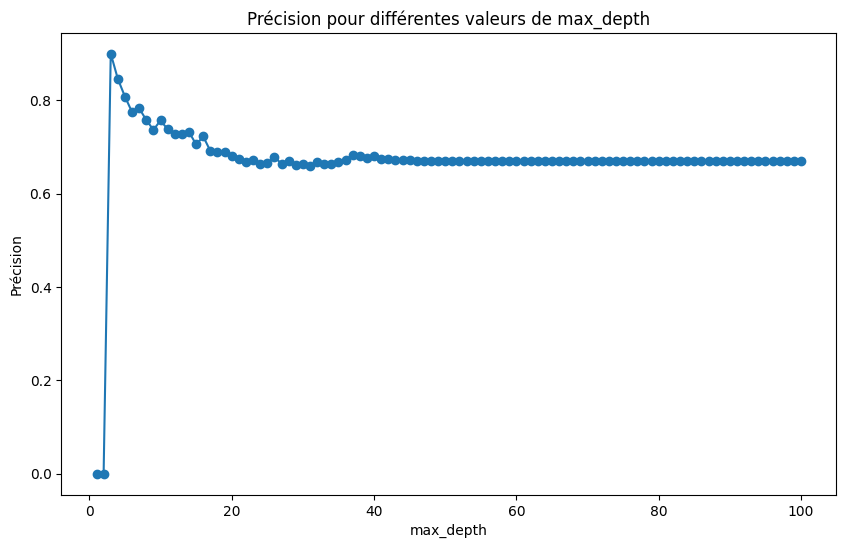

Précision : 0.8811

Rapport de classification (Random Forest Classifier):
               precision    recall  f1-score   support

           0       0.88      1.00      0.94      7952
           1       0.90      0.02      0.03      1091

    accuracy                           0.88      9043
   macro avg       0.89      0.51      0.48      9043
weighted avg       0.88      0.88      0.83      9043



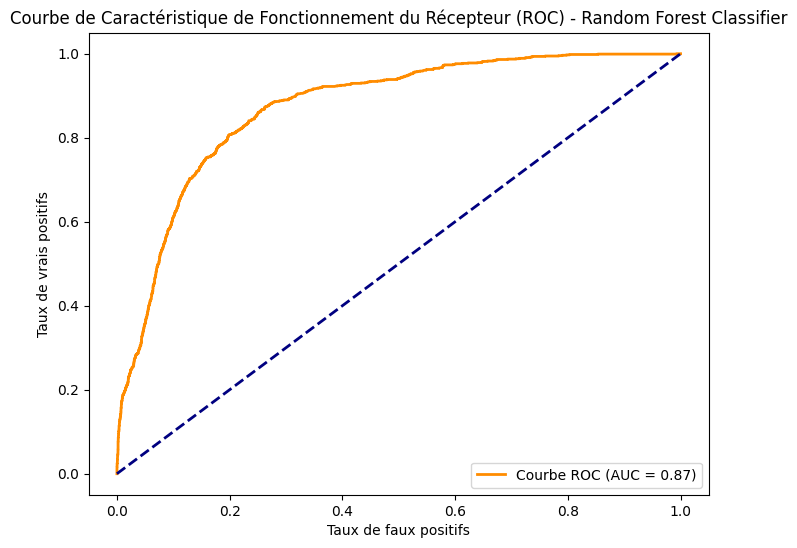


Score AUC (Random Forest Classifier) : 0.8723349492002427


In [ ]:
from sklearn.ensemble import RandomForestClassifier

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Plage de valeurs de max_depth à tester
max_depth_values = list(range(1, 101))

# Dictionnaire pour stocker les résultats
results_dict = {}

# Recherche du meilleur max_depth basé sur la précision
best_max_depth = 0
best_precision = 0

for max_depth_val in max_depth_values:
    # Création et ajustement du modèle Random Forest avec la valeur max_depth actuelle
    model = RandomForestClassifier(n_estimators=100, criterion="gini", max_depth=max_depth_val, random_state=42)
    model.fit(X_train_encoded, y_train_encoded)

    # Prédictions sur l'ensemble de test
    y_pred = model.predict(X_test_encoded)

    # Calcul de la précision et stockage des résultats
    precision = precision_score(y_test_encoded, y_pred)
    results_dict[max_depth_val] = precision

    # Mise à jour de best_max_depth si une précision plus élevée est trouvée
    if precision > best_precision:
        best_precision = precision
        best_max_depth = max_depth_val

# Affichage des résultats pour le meilleur max_depth
print(f"Meilleur max_depth : {best_max_depth}")
print(f"Précision pour le meilleur max_depth : {results_dict[best_max_depth]:.4f}")

# Tracé de la précision pour différentes valeurs de max_depth
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, [results_dict[val] for val in max_depth_values], marker='o')
plt.xlabel('max_depth')
plt.ylabel('Précision')
plt.title('Précision pour différentes valeurs de max_depth')
plt.show()

# Création et ajustement du modèle Random Forest final avec le meilleur max_depth
model_final = RandomForestClassifier(n_estimators=100, criterion="gini", max_depth=best_max_depth, random_state=42)
model_final.fit(X_train_encoded, y_train_encoded)

# Prédictions de probabilités pour la classe positive (pour la courbe ROC)
y_pred_proba_final = model_final.predict_proba(X_test_encoded)

# Obtention des étiquettes prédites
y_pred_final = model_final.predict(X_test_encoded)

# Rapport de classification pour le classifieur Random Forest
score_final = accuracy_score(y_test_encoded, y_pred_final)
result_final = classification_report(y_test_encoded, y_pred_final)
print(f"Précision : {score_final:.4f}")
print("\nRapport de classification (Random Forest Classifier):\n", result_final)

# Courbe ROC et AUC pour le classifieur Random Forest
fpr_final, tpr_final, thresholds_final = roc_curve(y_test_encoded, y_pred_proba_final[:, 1])
roc_auc_final = auc(fpr_final, tpr_final)

# Tracé de la courbe ROC pour le classifieur Random Forest
plt.figure(figsize=(8, 6))
plt.plot(fpr_final, tpr_final, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc_final:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe de Caractéristique de Fonctionnement du Récepteur (ROC) - Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

# AUC
print("\nScore AUC (Random Forest Classifier) :", roc_auc_score(y_test_encoded, y_pred_proba_final[:, 1]))


Random forest en combinant le coéfficient de gini et le critère d'entropie (Temps d'exécution : 3 s)

Précision combinée : 0.7884

Rapport de classification combiné :
               precision    recall  f1-score   support

           0       0.89      0.99      0.94      7952
           1       0.79      0.14      0.23      1091

    accuracy                           0.89      9043
   macro avg       0.84      0.57      0.59      9043
weighted avg       0.88      0.89      0.86      9043



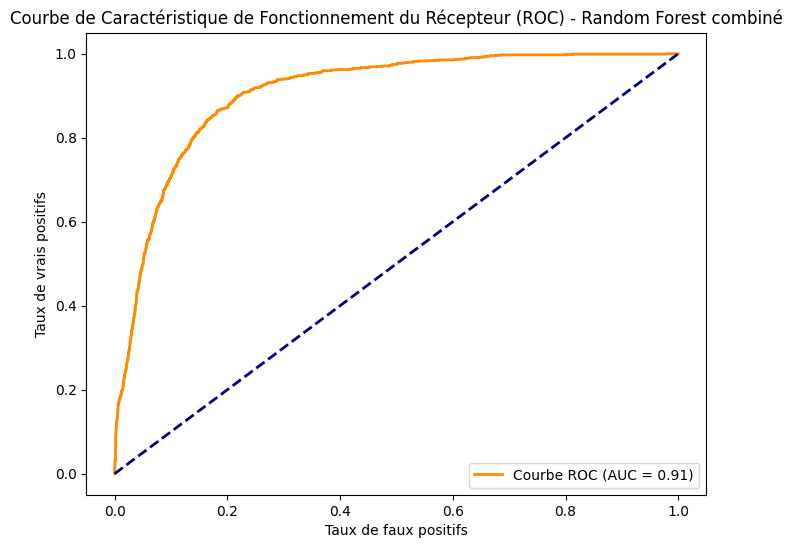


Score AUC (Random Forest combiné) : 0.9070631396075813


In [ ]:
from sklearn.ensemble import RandomForestClassifier

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

n_estimators = 100
max_depth = 6  # Nous avons remarqué que la valeur 6 permet d'obtenir de meilleures performances

# Création et ajustement de deux modèles Random Forest avec des critères différents
model_gini = RandomForestClassifier(n_estimators=n_estimators, criterion="entropy", max_depth=max_depth, random_state=42)
model_entropy = RandomForestClassifier(n_estimators=n_estimators, criterion="gini", max_depth=max_depth, random_state=42)

model_gini.fit(X_train_encoded, y_train_encoded)
model_entropy.fit(X_train_encoded, y_train_encoded)

# Prédictions sur l'ensemble de test
y_pred_gini = model_gini.predict(X_test_encoded)
y_pred_entropy = model_entropy.predict(X_test_encoded)

# Combinaison des prédictions en utilisant une règle simple, par exemple, en prenant le mode
y_pred_combined = np.array([np.argmax(np.bincount([pred_gini, pred_entropy])) for pred_gini, pred_entropy in zip(y_pred_gini, y_pred_entropy)])

# Calcul de la précision et d'autres métriques
precision_combined = precision_score(y_test_encoded, y_pred_combined)
accuracy_combined = accuracy_score(y_test_encoded, y_pred_combined)
result_combined = classification_report(y_test_encoded, y_pred_combined)

# Affichage des résultats
print(f"Précision combinée : {precision_combined:.4f}")
print("\nRapport de classification combiné :\n", result_combined)

# Courbe ROC et AUC pour le Random Forest combiné
y_pred_proba_gini = model_gini.predict_proba(X_test_encoded)[:, 1]
y_pred_proba_entropy = model_entropy.predict_proba(X_test_encoded)[:, 1]
y_pred_proba_combined = (y_pred_proba_gini + y_pred_proba_entropy) / 2  # Combinaison des probabilités par moyennage

fpr_combined, tpr_combined, thresholds_combined = roc_curve(y_test_encoded, y_pred_proba_combined)
roc_auc_combined = auc(fpr_combined, tpr_combined)

# Tracé de la courbe ROC pour le Random Forest combiné
plt.figure(figsize=(8, 6))
plt.plot(fpr_combined, tpr_combined, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc_combined:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe de Caractéristique de Fonctionnement du Récepteur (ROC) - Random Forest combiné')
plt.legend(loc="lower right")
plt.show()

# AUC
print("\nScore AUC (Random Forest combiné) :", roc_auc_score(y_test_encoded, y_pred_proba_combined))


#### Réflexion et remarque

On observe que cet algorithme distingue bien mieux la classification "oui" et affiche une meilleure AUC par rapport à l'algorithme KNeighbors et également à celui de l'arbre de décision. Cependant, il présente un rappel faible, indiquant que la précision pour identifier les véritables classifications "yes" est très bonne mais sur une faible quantité.

*   Entropie: Précision (classe 0) =0.89, précision (classe 1) = 0.84, recall (classe 1) = 0.10 et AUC = 0.89
*   Gini: Précision (classe 0) =0.88, précision (classe 1) = 0.90, recall (classe 1) = 0.02, et AUC = 0.89
*   Combinaison entropie et gini: Précision (classe 0) = 0.89, précision (classe 1) = 0.79, recall(classe 1) = 0.14 et AUC = 0.91

De plus, on remarque que les performances de la combinaison avec l'entropie et gini sont moins bonnes que celles qui ont utilisé un seul critère. Parmi ces trois, le Random Forest avec l'entropie affiche une meilleure performance avec une précision (classe 1) de 0.84, contre 0.88 pour celui de Gini et 0.88 pour la combinaison. De même pour la valeur de AUC. On remarque aussi un score-f1 très faible (classe 1) à cause d'un recall faible.

### Naïve bayésienne

Étant donné que nous avons observé une corrélation entre "pdays" et "previous", les attributs ne sont pas indépendants les uns des autres. Par conséquent, l'utilisation de l'algorithme de Naïve Bayes n'est pas appropriée. Cependant, par curiosité, nous souhaitons quand même essayer de voir quels résultats il peut nous fournir.

GaussianNB (Temps d'exécution : 1 s)

Accuracy: 0.8378

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.91      7952
           1       0.37      0.51      0.43      1091

    accuracy                           0.84      9043
   macro avg       0.65      0.70      0.67      9043
weighted avg       0.86      0.84      0.85      9043



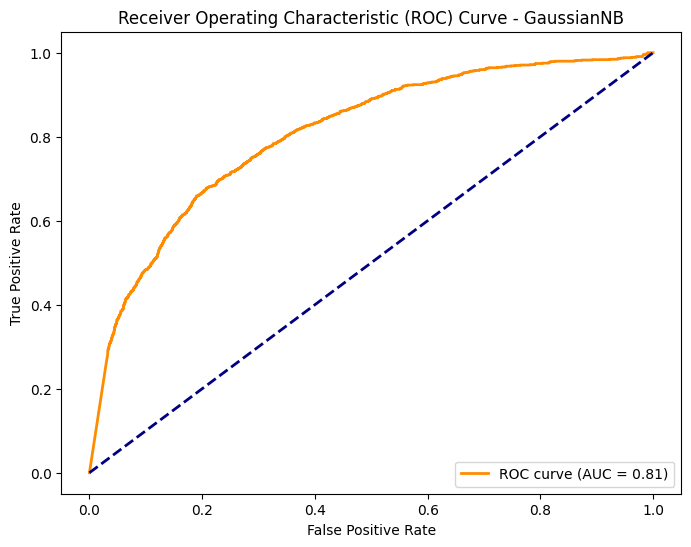


AUC Score (GaussianNB): 0.8066376028858764


In [ ]:
from sklearn.naive_bayes import GaussianNB

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Créez et entraînez le modèle de Bayes gaussien
model2 = GaussianNB()
model2.fit(X_train_encoded, y_train_encoded)

# Effectuez des prédictions et calculez l'accuracy et le rapport de classification
y_pred2 = model2.predict(X_test_encoded)
score2 = accuracy_score(y_test_encoded, y_pred2)
result2 = classification_report(y_test_encoded, y_pred2)

print(f"Accuracy: {score2:.4f}")
print("\nClassification Report:\n", result2)

# Prédisez les probabilités pour la classe positive (pour la courbe ROC)
y_pred_proba = model2.predict_proba(X_test_encoded)[:, 1]

# Courbe ROC et AUC pour GaussianNB
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Tracez la courbe ROC pour GaussianNB
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - GaussianNB')
plt.legend(loc="lower right")
plt.show()

# AUC
print("\nAUC Score (GaussianNB):", roc_auc_score(y_test_encoded, y_pred_proba))

#### Réflexion et remarque

Comme anticipé, il est observé que l'algorithme de classification Naïve Bayes ne présente pas une performance aussi élevée que d'autres algorithmes que nous avons utilisés, tels que ceux basés sur les voisins les plus proches (KNeighbors), les arbres de décision, et les forêts aléatoires. Mais on observe que son recall est pas assez bonne.



## Réseau de neurones


Multi-Layer Perceptron (Temps d'exécution : 1 min 40 s)

Accuracy: 0.8968

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      7952
           1       0.57      0.59      0.58      1091

    accuracy                           0.90      9043
   macro avg       0.76      0.76      0.76      9043
weighted avg       0.90      0.90      0.90      9043



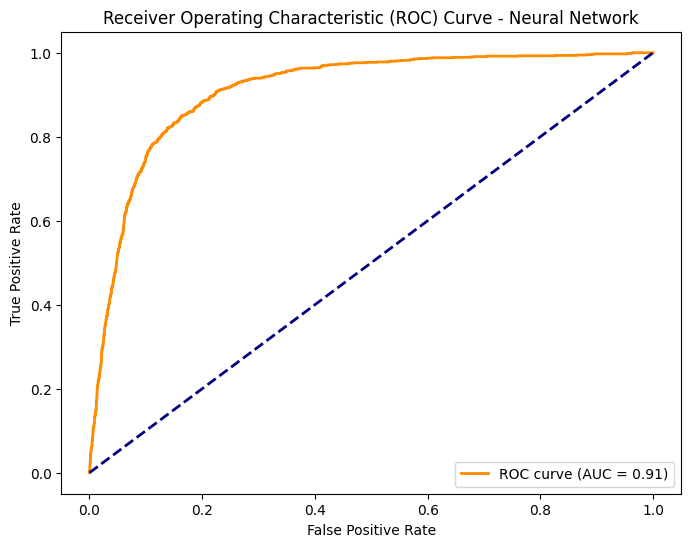


AUC Score (Neural Network): 0.9099810826461979


In [ ]:
from sklearn.neural_network import MLPClassifier

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Créez et entraînez le modèle de réseau de neurones
model_nn = MLPClassifier(hidden_layer_sizes=(128, 64, 32), max_iter=1000) # trois couches cachées de 128, 64 et 32 neurones respectivement.
model_nn.fit(X_train_encoded, y_train_encoded)

# Effectuez des prédictions et calculez l'accuracy et le rapport de classification
y_pred_nn = model_nn.predict(X_test_encoded)
score_nn = accuracy_score(y_test_encoded, y_pred_nn)
result_nn = classification_report(y_test_encoded, y_pred_nn)

print(f"Accuracy: {score_nn:.4f}")
print("\nClassification Report:\n", result_nn)

# Prédisez les probabilités pour la classe positive (pour la courbe ROC)
y_pred_proba_nn = model_nn.predict_proba(X_test_encoded)[:, 1]

# Courbe ROC et AUC pour le réseau de neurones
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test_encoded, y_pred_proba_nn)
roc_auc_nn = auc(fpr_nn, tpr_nn)

# La courbe ROC pour le réseau de neurones
plt.figure(figsize=(8, 6))
plt.plot(fpr_nn, tpr_nn, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_nn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Neural Network')
plt.legend(loc="lower right")
plt.show()

# AUC Score pour le réseau de neurones
print("\nAUC Score (Neural Network):", roc_auc_score(y_test_encoded, y_pred_proba_nn))


TensorFlow (Temps d'exécution : 27 s)

Epoch 1/20
453/453 - 2s - loss: 0.3216 - accuracy: 0.8876 - val_loss: 0.2839 - val_accuracy: 0.8912 - 2s/epoch - 5ms/step
Epoch 2/20
453/453 - 1s - loss: 0.2819 - accuracy: 0.8947 - val_loss: 0.2537 - val_accuracy: 0.8927 - 1s/epoch - 3ms/step
Epoch 3/20
453/453 - 1s - loss: 0.2551 - accuracy: 0.8971 - val_loss: 0.2272 - val_accuracy: 0.8958 - 1s/epoch - 2ms/step
Epoch 4/20
453/453 - 1s - loss: 0.2393 - accuracy: 0.8995 - val_loss: 0.2158 - val_accuracy: 0.9019 - 1s/epoch - 3ms/step
Epoch 5/20
453/453 - 1s - loss: 0.2305 - accuracy: 0.9028 - val_loss: 0.2126 - val_accuracy: 0.9027 - 1s/epoch - 2ms/step
Epoch 6/20
453/453 - 1s - loss: 0.2243 - accuracy: 0.9045 - val_loss: 0.2099 - val_accuracy: 0.9052 - 808ms/epoch - 2ms/step
Epoch 7/20
453/453 - 1s - loss: 0.2201 - accuracy: 0.9028 - val_loss: 0.2086 - val_accuracy: 0.9077 - 930ms/epoch - 2ms/step
Epoch 8/20
453/453 - 1s - loss: 0.2176 - accuracy: 0.9049 - val_loss: 0.2070 - val_accuracy: 0.9059 - 669ms/epoch - 1ms/step
Epoch 9/20
453/

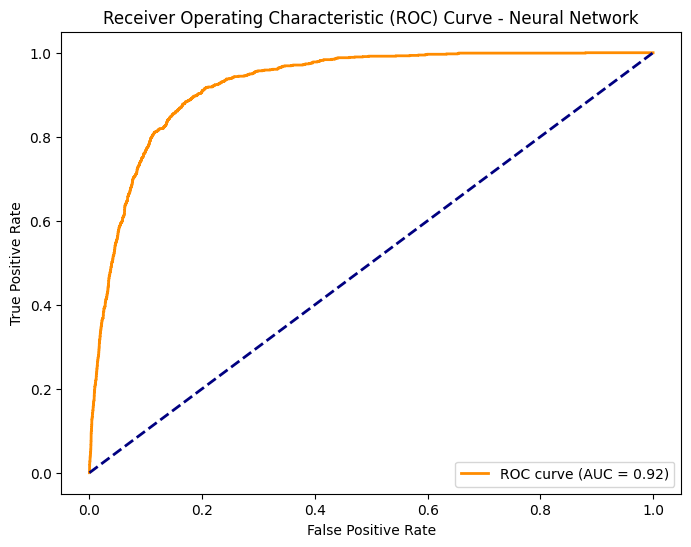


AUC Score (Neural Network): 0.924351044396535


In [ ]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Utilisez LabelEncoder pour encoder les classes
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Normalisation des données d'entrée
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Création et entraînement du modèle de réseau de neurones avec TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilation du modèle
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy', metrics=['accuracy'])

# Entraînement du modèle
history = model.fit(X_train_scaled, y_train_encoded, epochs=20, batch_size=64, validation_split=0.2, verbose=2)

# Évaluation des performances du modèle sur l'ensemble de test
y_pred_probs = model.predict(X_test_scaled)
y_pred = (y_pred_probs > 0.5).astype(int)

# Évaluation des performances du modèle
accuracy = accuracy_score(y_test_encoded, y_pred)
classification_report_result = classification_report(y_test_encoded, y_pred)

# Affichage des résultats
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report_result)

# Prédisez les probabilités pour la classe positive (pour la courbe ROC)
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_probs)
roc_auc = auc(fpr, tpr)

# La courbe ROC pour le réseau de neurones
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Neural Network')
plt.legend(loc="lower right")
plt.show()

# AUC Score pour le réseau de neurones
print("\nAUC Score (Neural Network):", roc_auc_score(y_test_encoded, y_pred_probs))


#### Réflexion et remarque

L'algorithme de réseau de neurones est peut-être celui qui est le plus complexe car il nécessite beaucoup d'ajustements. On obtient des performances assez efficaces, mais le temps d'exécution est plus long. Il peut prendre plusieurs minutes, alors qu'on observe des performances similaires et un temps d'exécution plus court avec l'algorithme d'arbre de décision.

## Régression logistique

Temps d'exécution : immédiat


Précision: 0.8936193741015149

Rapport de Classification:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7952
           1       0.64      0.27      0.38      1091

    accuracy                           0.89      9043
   macro avg       0.77      0.62      0.66      9043
weighted avg       0.87      0.89      0.87      9043



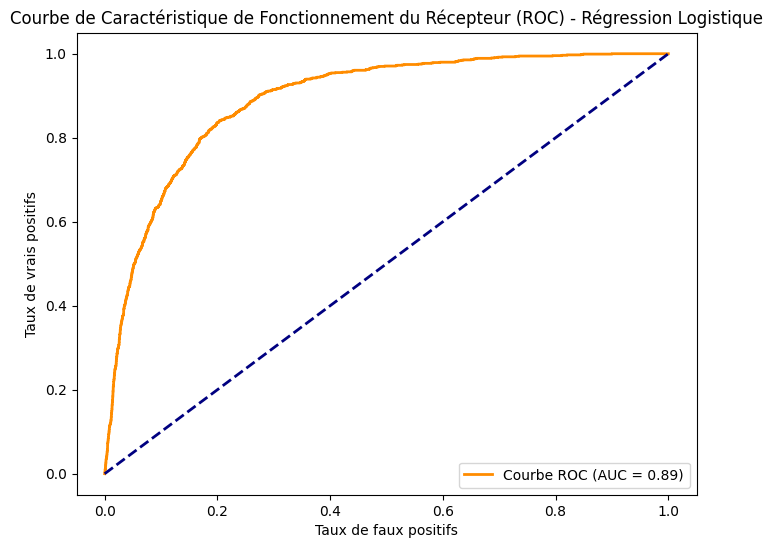


Score AUC (Régression Logistique): 0.8905907949991423


In [ ]:
from sklearn.linear_model import LogisticRegression

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Création d'un modèle de régression logistique
logreg_model = LogisticRegression()

# Ajustement du modèle aux données d'entraînement
logreg_model.fit(X_train_encoded, y_train_encoded)

# Prédictions sur l'ensemble de test
y_pred = logreg_model.predict(X_test_encoded)

# Précision
accuracy = accuracy_score(y_test_encoded, y_pred)
print("\nPrécision:", accuracy)

# Rapport de classification
report = classification_report(y_test_encoded, y_pred)
print("\nRapport de Classification:\n", report)

# Courbe ROC et AUC pour la régression logistique
y_pred_proba = logreg_model.predict_proba(X_test_encoded)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_proba)
roc_auc = auc(fpr, tpr)

# La courbe ROC pour la régression logistique
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe de Caractéristique de Fonctionnement du Récepteur (ROC) - Régression Logistique')
plt.legend(loc="lower right")
plt.show()

# Score AUC pour la régression logistique
print("\nScore AUC (Régression Logistique):", roc_auc_score(y_test_encoded, y_pred_proba))


#### Réflexion et remarque

Les performances sont considérées comme faibles, car on observe une précision et un rappel (classe 1) inférieurs par rapport aux algorithmes examinés précédemment.

## Machine à vecteurs de support (SVM)

Temps d'exécution : 2 min 16 s

Accuracy: 0.8857

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.58      0.18      0.28      1091

    accuracy                           0.89      9043
   macro avg       0.74      0.58      0.61      9043
weighted avg       0.86      0.89      0.86      9043



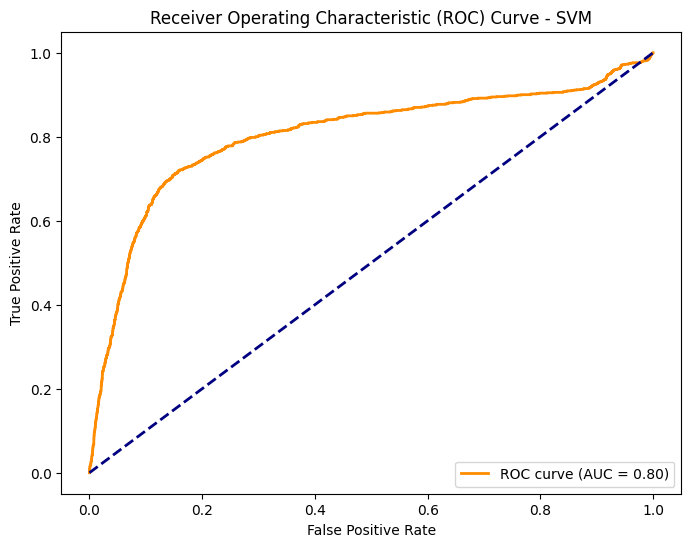


AUC Score (SVM): 0.8028909594136774


In [ ]:
from sklearn.svm import SVC

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Créer et entraîner le modèle SVM
model_svm = SVC(probability=True)  # probability=True pour permettre le calcul des probabilités pour la courbe ROC
model_svm.fit(X_train_encoded, y_train_encoded)

# Effectuer des prédictions et calculer l'accuracy et le rapport de classification
y_pred_svm = model_svm.predict(X_test_encoded)
score_svm = accuracy_score(y_test_encoded, y_pred_svm)
result_svm = classification_report(y_test_encoded, y_pred_svm)

print(f"Accuracy: {score_svm:.4f}")
print("\nClassification Report:\n", result_svm)

# Prédire les probabilités pour la classe positive (pour la courbe ROC)
y_pred_proba_svm = model_svm.predict_proba(X_test_encoded)[:, 1]

# Courbe ROC et AUC pour le modèle SVM
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test_encoded, y_pred_proba_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Tracer la courbe ROC pour le modèle SVM
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVM')
plt.legend(loc="lower right")
plt.show()

# AUC
print("\nAUC Score (SVM):", roc_auc_score(y_test_encoded, y_pred_proba_svm))


#### Réflexion et remarque

Nous constatons que l'algorithme SVM n'est pas aussi performant, car il ne présente pas de bonnes performances en termes de précision, recall F1-score (classe 1) et d'AUC par rapport aux autres algorithmes. C'est l'algorithme qui offre les moins bonnes performances par rapport aux autres.

## Régression linéaire

Régression linéaire simple (Temps d'exécution : 4 s)

Précision : 0.8993

Rapport de classification (Régression logistique):
               precision    recall  f1-score   support

           0       0.92      0.98      0.94      7952
           1       0.66      0.34      0.45      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.66      0.70      9043
weighted avg       0.88      0.90      0.89      9043



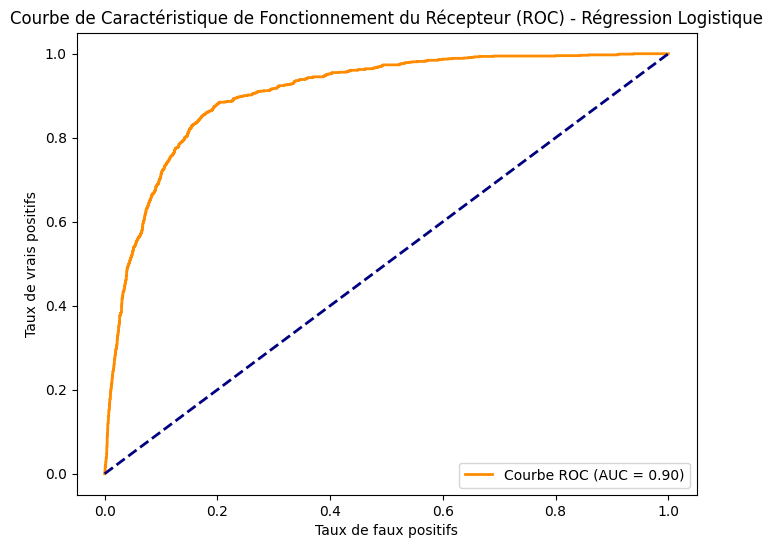


Score AUC (Régression Logistique): 0.9042626519889272


In [ ]:
from sklearn.linear_model import LogisticRegression

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Création et entraînement du modèle de régression logistique
model3 = LogisticRegression(max_iter=10000)
model3.fit(X_train_encoded, y_train_encoded)

# Prédictions des probabilités pour la classe positive
y_pred_proba3 = model3.predict_proba(X_test_encoded)

# Obtention des étiquettes prédites
y_pred3 = model3.predict(X_test_encoded)

# Rapport de classification pour la régression logistique
score3 = accuracy_score(y_test_encoded, y_pred3)
result3 = classification_report(y_test_encoded, y_pred3)
print(f"Précision : {score3:.4f}")
print("\nRapport de classification (Régression logistique):\n", result3)

# Courbe ROC et AUC pour la régression logistique
fpr3, tpr3, thresholds3 = roc_curve(y_test_encoded, y_pred_proba3[:, 1])
roc_auc3 = auc(fpr3, tpr3)

# Tracé de la courbe ROC pour la régression logistique
plt.figure(figsize=(8, 6))
plt.plot(fpr3, tpr3, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc3:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe de Caractéristique de Fonctionnement du Récepteur (ROC) - Régression Logistique')
plt.legend(loc="lower right")
plt.show()

# AUC
print("\nScore AUC (Régression Logistique):", roc_auc_score(y_test_encoded, y_pred_proba3[:, 1], average="weighted"))


Régression linéaire polynomiale (Temps d'exécution : 6 min 27 s)

Précision : 0.9008

Rapport de classification (Régression logistique polynomiale):
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      7952
           1       0.65      0.38      0.48      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.68      0.71      9043
weighted avg       0.89      0.90      0.89      9043



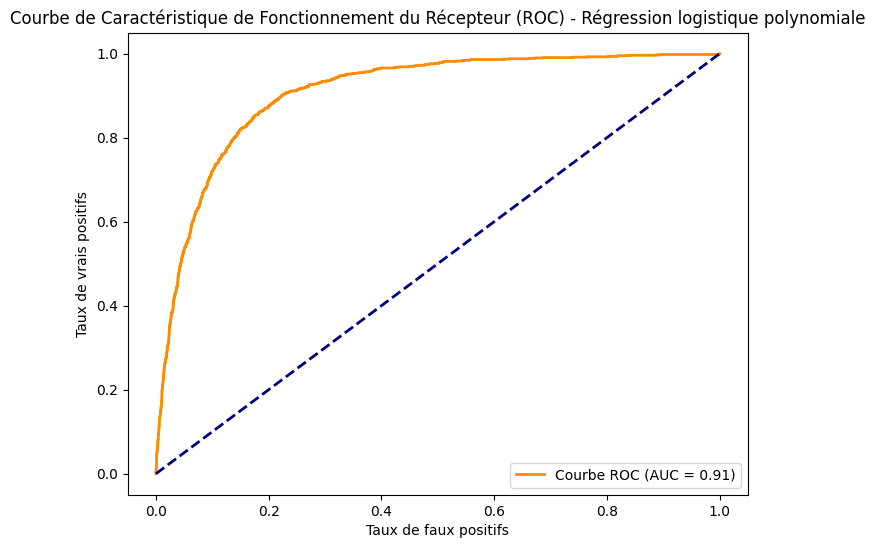


Score AUC (Régression logistique polynomiale): 0.9079798451571021


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder

# Encodage des labels catégoriques si nécessaire
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Création des caractéristiques polynomiales
degree = 2
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train_encoded)
X_test_poly = poly.transform(X_test_encoded)

# Ajustement du modèle de régression logistique
model3 = LogisticRegression(max_iter=10000)
model3.fit(X_train_poly, y_train_encoded)

# Prédictions des probabilités pour la classe positive
y_pred_proba3 = model3.predict_proba(X_test_poly)

# Obtention des labels prédits
y_pred3 = model3.predict(X_test_poly)

# Rapport de classification pour la régression logistique polynomiale
score3 = accuracy_score(y_test_encoded, y_pred3)
result3 = classification_report(y_test_encoded, y_pred3)
print(f"Précision : {score3:.4f}")
print("\nRapport de classification (Régression logistique polynomiale):\n", result3)

# Courbe ROC et AUC pour la régression logistique polynomiale
fpr3, tpr3, thresholds3 = roc_curve(y_test_encoded, y_pred_proba3[:, 1])
roc_auc3 = auc(fpr3, tpr3)

# Tracé de la courbe ROC pour la régression logistique polynomiale
plt.figure(figsize=(8, 6))
plt.plot(fpr3, tpr3, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc3:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe de Caractéristique de Fonctionnement du Récepteur (ROC) - Régression logistique polynomiale')
plt.legend(loc="lower right")
plt.show()

# Score AUC pour la régression logistique polynomiale
print("\nScore AUC (Régression logistique polynomiale):", roc_auc_score(y_test_encoded, y_pred_proba3[:, 1], average="weighted"))


#### Réflexion et remarque

On constate des performances acceptables comparées à d'autres algorithmes de classification, notamment avec la métrique AUC qui surpasse celle des algorithmes tels que KNN, arbre de décision, Naïve bayésienne, etc.


# 6. Conclusion

Nous avons constaté que chaque algorithme présente ses propres forces et faiblesses, car il n'existe pas d'algorithme parfait. Nous allons tirer des conclusions à partir de différents points de vue.



*   Précision pour la classification "yes" :

    L'algorithme Random Forest avec le critère d'entropie semble être le meilleur choix si l'objectif est d'obtenir une précision aussi élevée que possible pour la classification "yes". Cette méthode pourrait être privilégiée lorsque minimiser les faux positifs est crucial.


*   Recall pour la classification "yes" :

    L'algorithme des arbres de décision avec l'entropie offre les meilleurs performances en terme de recall.

*   Score F1 pour la classification "yes" :

    L'algorithme de l'arbre de décision et KNN se distinguent en ce qui concerne le score F1 pour la classification "yes". Si l'accent est mis sur un équilibre entre la précision et le rappel, ces deux algorithmes peuvent être privilégiés. Le score F1 est particulièrement important dans les situations où les classes sont déséquilibrées.

*   Mesure globale de la capacité à discriminer entre les classes (AUC) :

    En ce qui concerne l'aire sous la courbe (AUC), plusieurs algorithmes, tels que la régression logistique et Random Forest, présentent des performances similaires. L'AUC offre une vue globale de la capacité d'un modèle à discriminer entre les classes, et ces algorithmes se démarquent dans cette mesure.

Nous sommes conscients que certains algorithmes pourraient bénéficier d'améliorations supplémentaires, par exemple, celui du réseau de neurones, qui est complexe. Cependant, en raison de contraintes de temps, nous avons opté pour des compromis dans l'analyse approfondie de chaque algorithme. Les choix futurs pourraient inclure des ajustements spécifiques pour maximiser les performances de ces algorithmes plus complexes.